---

## **ELEN 6885 - Reinforcement Learning**

## Reward Shaping for Battery Control in CityLearn: Penalizing Peak Increases and Export Waste

### JingZeng Xie (jx2668@columbia.edu), Linghao Tian (lt3035@columbia.edu)

---

<a name="overview"></a>
# Overview
---

This workshop will consist of a presentation of the underlying background for CityLearn and its relevance to climate change mitigation. We provide a walk-through tutorial on how to set up and interact with the simulation environment using a real-world dataset from a grid-interactive residential community in Fontana, California.

This notebook will provide a guide on how to use a simple rule-based control architecture and advanced reinforcement control algorithms to manage batteries in each home in the community with a goal of minimizing the cost of purchased electricity, carbon emissions associated with consuming electricity from the grid, as well as improve on other grid-level KPIs e.g. peak demand, load factor and ramping that are critical for the long-term sustainability of decarbonizing existing power generation sources on the supply side and electrification of buildings on the demand side.

## Learning Outcomes

The primary learning outcome for participants is to gain familiarity with CityLearn environment, its application programming interface (API) and dataset offerings for extended use in academic research or personal projects. Other secondary outcomes are to:

1. Understand how electrification, distributed energy resources e.g. batteries, photovoltaic (PV) systems and smart controls provide a promising pathway to decarbonization and energy flexibility.
2. Learn how to design and optimize their own rule-based control (RBC) agent for battery management using readily available knowledge of a building's energy use.
3. Identify the challenges surrounding the generalizability of an RBC agent and how reinforcement learning (RL) can mitigate these challenges.
4. Train their own RL Tabular Q-Learning algorithm.
5. Evaluate the performance of a standard model-free deep RL algorithm in optimizing key performance indicators (KPIs) that are targeted at quantifying energy flexibility, environmental and economic costs.
6. Learn the effect of different control algorithms and their parameters in improving these KPIs.

<a name="climate-impact"></a>
# Climate Impact
---

The residential building stock in the United States is responsible for 21% ([Energy Information Administration, 2022](https://www.eia.gov/totalenergy/data/monthly/archive/00352211.pdf)) of energy consumption and 20% of greenhouse gas emissions ([Goldenstein et al., 2020](https://doi.org/10.1073/pnas.1922205117)). Electrification of end-uses, as well as decarbonizing the electrical grid through renewable energy sources such as solar and wind, constitutes a pathway to zero-emission buildings ([Leibowicz et al., 2018](https://doi.org/10.1016/j.apenergy.2018.09.046)). However, electrifying fossil-fueled building end-uses in fact could increase the demand on the existing electricity power grid and if power generation sources are not decarbonized at a similar rate as electrification happening on the demand side, will in fact result in adverse effects of increased greenhouse gas (GHG) emissions. Also, new grid infrastructure constitutes a significant capital investment and requires extensive planning and execution.

Through distributed energy resources (DERs), buildings can provide flexibility services to the existing grid infrastructure in demand response events. On-site solar photovoltaic (PV) systems can also reduce dependence on the grid through self-generation. Yet, the intermittency of renewable energy sources introduces additional challenges of grid instability due to a mismatch between electricity generation (supply) and demand ([Suberu et al., 2014](https://doi.org/10.1016/j.rser.2014.04.009)). The California duck-curve is a good illustration of the mismatch in renewable supply and demand, and shows the effect of increased PV penetration that may lead to high ramp rate after the sun sets in the evening which the electric power grid may not be able to handle ([Denholm et al., 2008](https://www.nrel.gov/docs/fy08osti/42305.pdf)).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/california_duck_curve.png?raw=true"  width="600" alt="Load shapes in California with various PV penetration scenarios in the United States western grid.">
  <figcaption>Figure: Load shapes in California highlighting the duck curve caused by various PV penetration scenarios in the western United States grid (modified from <a href="https://www.nrel.gov/docs/fy08osti/42305.pdf">Denholm et al., 2008</a>).</figcaption>
</figure>

Advanced control algorithms including model-predictive control (MPC) and reinforcement learning control (RLC) are thus, critical to properly manage DERs and even out the supply-demand imbalance brought about by renewable energy sources. However, a major challenge for the adoption of reinforcement learning (RL) in grid-interactive efficient buildings (GEBs) is the ability to benchmark control algorithm performance to accelerate their deployment on live systems.

CityLearn ([Vazquez-Canteli et al., 2019](https://doi.org/10.1145/3360322.3360998)) provides a platform for such benchmarking tasks. The different stakeholder in the energy and real-estate market including, utility companies, grid-operators, home-owners and policy makers can utilize CityLearn to make decisions on what control policies are viable and provide the best performance as more controllable DERs become available.

<a name="background"></a>
# Background
---


## Grid-Interactive Efficient Buildings and their Energy Flexibility

As buildings become electrified and the penetration of renewable energy source increases, a smart approach to manage and control building loads to ensure that these developments do not bring about grid insecurity is needed. The Department of Energy (DOE), introduced the __Grid-Interactive Efficient Building (GEB)__ Initiative to promote the integration of distributed energy resources (DERS) such as photovoltaic (PV) systems, electric vehicles (EVs), active and passive storage systems e.g. batteries, thermal storage tanks and thermal mass (walls) in buildings that can provide the grid with energy flexibility. A GEB is defined by [Neukomm et al., 2019](https://www1.eere.energy.gov/buildings/pdfs/75470.pdf)] as:

> [...] an energy-efficient building that uses smart technologies and on-site DERs to provide demand flexibility while co-optimizing for energy cost, grid services, and occupant needs and preferences, in a continuous and integrated way.

GEBs are characterized by their energy efficiency, interconnectivity, smartness and energy flexibility as highlighted in the figure below:

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building-neukomm.png?raw=true"  width="600" alt="The characteristics of a Grid-Interactive Efficient Building (GEB)">
  <figcaption>Figure: The characteristics of a Grid-Interactive Efficient Building (GEB) (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

The energy efficiency of GEBs by means of tighter envelopes and high-quality construction that minimize heat losses lead to reduced loads without the need to make changes to a building's function or for changes in occupant preferences. PV adoption in GEBs provides self-generation capabilities which reduce the net load (difference between building end-use load and renewable energy generation) that will otherwise be satisfied by the electric grid alone. To then solve the duck curve problem that is introduced by renewable power generation, GEBs are able to shed and/or shift their loads. In load shedding, GEBs reduce their electricity use for a short time period and typically on short notice during peak demand periods. Load shifting in GEBs entails intentional and planned change in the timing of electricity use to reduce the demand on the grid during typical peak periods. Load shifting helps take advantage of cheaper and cleaner electricity. Load shedding can result in shifting the shedded load.

The figure below shows the changes in a building profile as it becomes more efficient, incorporates self generation and provides load shedding and shifting grid services.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building_profile-neukomm.png?raw=true"  width="600" alt="GEB load profiles">
  <figcaption>Figure: GEB load profiles (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

Particularly, load shifting services could be achieved through control of active storage systems in combination with renewable power generation. Smart controls can adapt to changes in occupant behavior, weather conditions or respond to external signals e.g. temperature set-point as in the case of demand-response, while maintaining energy efficiency and without causing discomfort to occupants. This adaptability is often referred to as __energy flexibility__ of a building ([Jensen et al., 2017](https://doi.org/10.1016/j.enbuild.2017.08.044)).

## Control Theories for Grid-Interactive Efficient Buildings
Rule-based control (RBC) is a popular control theory for building energy management. It makes use of simple if-else statements in their decision making process e.g. "if outdoor dry-bulb temperature is < 20<sup>o</sup>C and hour is 10 PM, charge battery by 5% of its capacity". Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for executing grid services by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. Comparatively, RBC and RLC are inexpensive to implement as they have a lower entry bar for domain knowledge of the systems to be controlled. RBC and vanilla RLC may perform sub-optimally compared to MPC as they are not modeled after the system under control although there exists a branch of RLC that includes a model of the controlled system. However, RLC is a data-driven solution and as more training data become available, it _learns_ the model of the building or system under control and achieves comparable performance as MPC. The greatest strength of RLC is its ability to adapt to changes in the system or building it controls as the dynamics e.g. thermal, occupancy change. We provide more context on reinforcement learning in the following section.

## Reinforcement Learning Control for Grid-Interactive Efficient Buildings

Here we provide a simple description of reinforcement learning (RL) in the context of grid-interactive efficient buildings (GEBs) with as little theoretical jargon as possible 🙂. For a more detailed description of RL, refer to the [BOPTEST Tutorial Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_) and for a thorough introduction, refer to [Sutton and Barto, 2018](http://www.incompleteideas.net/book/the-book.html).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/supervised_vs_unsupervised_vs_rl.png?raw=true"  width="250" alt="Overview of the three machine learning techniques.">
  <figcaption>Figure: Overview of the three machine learning techniques (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

Machine learning techniques are generally characterized as either supervised or unsupervised learning. In supervised learning, the observations, otherwise called samples, and their response, otherwise called target are known when training the model. Supervised learning is further classified into regression and classification models where the former learns to predict a continuous variable and the latter learns to predict a discrete class. The supervised machine learning model must then learn the mapping of samples and targets by minimizing a loss function that evaluates the error between predicted targets and actual targets. An example of regression modelling in the context of GEBs is the prediction of a building's electricity consumption (target) when the the weather conditions e.g. dry-bulb temperature and relative humidity, as well as their associated timestamps (samples) are known. An example of a classification model in the context of GEBs is the prediction of a binary variable such as if building is "occupied" or "not occupied" (target) given the same samples as the regression example. It so happens that these kinds of problems are common in the building energy domain where predicting a building's electricity consumption and occupancy can help with scheduling and occupant-centric control to balance energy efficiency and comfort.

Unsupervised learning on the other hand differs from supervised learning in the sense that the associated targets for the samples are unknown but models can be used to find common patterns amongst samples. This is important especially in exploratory data analysis to draw preliminary conclusions about a new dataset, and in situations where the class labels are unknown. An unsupervised model can then be used to infer data-driven class labels that can be used as targets in supervised classification models. An example of such application in buildings is the classification of customer load profiles to determine and allocate appropriate tariff plans.

RL is similar to both supervised and unsupervised learning such that it follows the same idea of learning from observations. However in contrast to supervised learning, there are no known labeled targets. Instead, a model (agent/controller) influences the targets by acting in an environment that rewards actions that have desirable outcomes but penalizes those that lead to adverse outcomes. An example of RL in GEBs is charging/discharging of a battery (action) every hour (control time step) with the objective of minimizing the sum of electricity consumption of a building over a control horizon e.g. a year, given the same sample variables in the supervised learning example (observations). These actions affect the hourly electricity consumption of the building (reward). RL is thought of as a trial an error approach because typically, the agent starts off with no prior knowledge of the environment it acts in but learns from experience to associate observations with actions that maximize its rewards. The association is called a control policy.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/reinforcement_learning.png?raw=true"  width="400" alt="Basic structure of reinforcement learning.">
  <figcaption>Figure: Basic structure of reinforcement learning (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

The experiential learning characteristic of RL is very promising for GEBs because it provides a scalable control solution as it can adapt to each building's unique conditions and occupant interactions that influence observations. It also means that the agent need not have a building's model that can involve a level of complexity that is expensive to design for. [Vazquez-Canteli et al., 2019](https://doi.org/10.1016/j.apenergy.2018.11.002) provide a comprehensive overview of reinforcement learning in the built environment.

## CityLearn

[CityLearn](https://doi.org/10.1145/3360322.3360998) is an open source OpenAI Gym environment targeted at the easy implementation and benchmarking of simple and advanced control algorithms e.g. rule-based control (RBC) model predictive control (MPC) or reinforcement learning control (RLC). It has been utilized in [demand response, energy management, voltage regulation and algorithm benchmarking applications](https://www.citylearn.net/#applications). CityLearn is used in [The CityLearn Challenge](https://www.citylearn.net/citylearn_challenge/index.html) which is an opportunity to compete in investigating the potential of AI and distributed control systems to tackle multiple problems in the built-environment. It attracts a multidisciplinary audience including researchers, industry experts, sustainability enthusiasts and AI hobbyists as a means of crowd-sourcing solutions to these multiple problems.

### Environment

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_building_schematic.png?raw=true"  width="300" alt="An overview of the heating, ventilation and air conditioning systems, energy storage systems, on-site electricity sources and grid interaction in buildings in the CityLearn environment." style="background-color:white;margin:20px;padding:5px">
  <figcaption>Figure: An overview of the heating, ventilation and air conditioning systems, energy storage systems, end uses, on-site electricity sources and grid interaction in buildings in the CityLearn environment.</figcaption>
</figure>

The CityLearn environment includes simplified energy models of buildings that are made up of heating, ventilation and air conditioning (HVAC) systems including air-to-water heat pumps and electric heaters. Buildings can optionally include energy storage systems (ESSs) for load shifting including batteries and thermal energy storage (TES) systems. These ESSs may be used during peak, high carbon intensity or expensive periods to meet space cooling, space heating, domestic hot water and non-shiftable (plug) loads. A collection of buildings make up a district (alias neighborhood or community).

In each building, space cooling, space heating and domestic hot water heating end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water heating loads are satisfied through electric heaters. Each ESS is charged by the HVAC system (heat pump or electric heater) that satisfies the end-use its stored energy services. All HVAC systems and non-shiftable plug loads consume electricity from any of the available electricity sources as well as the grid. Photovoltaic (PV) systems may be included as an electricty source in a building to offset all or part of the electricity consumption from the grid. Excess PV generation is wasted as there is no energy flow between buildings.

### Control

A rule-based control (RBC), reinforcement learning control (RLC) or model predictive control (MPC) agent manages energy storage in a building by determining how much energy to store or release at any given time. The agent receives [observations](https://www.citylearn.net/overview/observations.html) from the environment and returns [actions](https://www.citylearn.net/overview/actions.html) based on some control policy. CityLearn guarantees that, at any time, the space cooling, space heating, domestic hot water heating and non-shiftable plug loads are satisfied irrespective of the control actions by:

1. utilizing pre-computed or pre-measured ideal loads as input data (ideal load refers to the energy that must be provided by an energy system to meet a control setpoint e.g. an air conditioner providing cooling energy to meet a cooling temperature setpoint of 23C in a room);
2. sizing the heating, ventilation and air conditioning (HVAC) systems for peak ideal loads; and
3. prioritizing the satisfaction of buildings loads before storing energy.

In the case of energy discharge from the energy storage systems (ESSs), a backup controller guarantees that discharged energy does not exceed the building loads.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_centralized_control_schematic.png?raw=true"  width="300" alt="An overview of the power sources, energy systems and end-uses in CityLearn." style="background-color:white;margin:50px;padding:5px;">

  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_decentralized_control_schematic.png?raw=true"  width="290" alt="An overview of centralized (left) and decentralized with optional information sharing (right) control strategies in CityLearn." style="background-color:white;margin:50px;padding:5px;">
  <figcaption>Figure: An overview of centralized (left) and decentralized with optional information sharing (right) control strategies in CityLearn.</figcaption>
</figure>

CityLearn allows for centralized or decentralized control strategies. In a centralized control strategy, one agent manages the energy storage systems (ESSs) in the entire district whereas in a decentralized control strategy a one-controller-to-one-building approach is taken such that an independent controller manages the ESSs in a specific building. In the centralized control strategy, the controller receives district-level observations that may include individual building observations e.g. a building's net electricity consumption as well as observations that are common in all buildings e.g. hour of the day. The central controller then prescribes actions for each building's ESSs. In the decentralized control strategy, each agent receives observations and returns actions for one building. The agents in the decentralized strategy may however choose to share information to achieve cooperative or competitive objectives. An example of a decentralized strategy with information sharing is the [MARLISA algorithm](https://doi.org/10.1145/3408308.3427604) developed in tandem with CityLearn.

### Datasets

The CityLearn environment makes use of [datasets](https://www.citylearn.net/overview/dataset.html#dataset) to define the simulation environment as well as provide the control agent with observations. The data files include a `schema.json` that is used to initialize the environment and comma-separated variable (CSV) files containing time series data that provide the agent with observations such as building space ideal cooling loads, ideal heating loads, ideal domestic hot water heating loads, plug loads, weather conditions, carbon intensity, time of use (ToU) electricity pricing, etc., that are independent of control actions (i.e. observations that are not a function of the control actions). [See the CityLearn documentation](https://www.citylearn.net/overview/dataset.html#dataset) for a detailed explanation of CityLearn datasets and examples.

# Hands-On Experiments
---

The previous sections have motivated the purpose of this tutorial as well as provided background theoretical information on reinforcement learning control (RLC) and the CityLearn environment while highlighting their importance in harnessing energy flexibility in grid-interactive efficient buildings (GEBs). The following sections will be hands-on as we will go over the experiments that this tutorial covers.

Using the `citylearn_challenge_2022_phase_all` dataset, we will __learn how to__ design a controller for battery management in up to 15 buildings for load shifting flexibility where each building also has a photovoltaic (PV) system for self-generation. This way, the battery-PV system provide flexibility in the district of buildings.

We will implement three types of control algorithms namely:
1. Rule-based control (RBC)
2. Tabular Q-Learning (TQL)
3. Soft-Actor Critic (SAC)

Rule-based control is a simple control theory where rules or statements that are usually in the form of `if X do Y else ...` are used to prescribe an appropriate control action at a given point in time. Tabular Q-Learning and SAC are both reinforcement learning (RL) algorithms where the difference between the two is that while in Tabular Q-Learning, Q-values are updated through exhaustive exploration and exploitation of the environment, SAC uses a function approximator to estimate the Q-values to accelerate learning. More information about Tabular Q-Learning, Q-values and SAC will be provided in the following sections so do no worry if they are not familiar terms _yet_ 🙂.

By using these three control algorithms, we will highlight some of their strengths and weaknesses. We will evaluate their ability to solve the control problem using a set of key performance indicators (KPIs).

<a name="software-requirements"></a>
# Requirements
---

This section installs and imports the software packages that will be used in the remainder of the tutorial. We start off by comparing the Python version of this current environment. CityLearn and its dependencies will work with `python>=3.7.x`

The following Python packages are required (takes about 3 mins to run to completion):

In [ ]:
%%capture

# The environment we will be working with
!pip install CityLearn==2.1.2

# For participant interactions (buttons)
!pip install ipywidgets

# To generate static figures
!pip install matplotlib
!pip install seaborn

# Provide standard RL algorithms
!pip install stable-baselines3

# Enable gym compatibility with later stable-baselines3 versions
!pip install shimmy


We can now import the relevant modules, classes and functions used in the tutorial:

In [2]:
# System operations
import os

# Date and time
from datetime import datetime

# type hinting
from typing import Any, List, Mapping, Tuple, Union

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# User interaction
from IPython.display import clear_output
from ipywidgets import Button, FloatSlider, HBox, HTML
from ipywidgets import IntProgress

# Data manipulation
import math
import numpy as np
import pandas as pd
import random
import simplejson as json

# CityLearn
from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import NormalizedObservationWrapper
from citylearn.wrappers import StableBaselines3Wrapper
from citylearn.wrappers import TabularQLearningWrapper

# baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Couldn't import dot_parser, loading of dot files will not be possible.


c:\Users\79206\Downloads\CityLearn-2.1.2\citylearn\citylearn.py:31: DeprecationWarning: private variables, such as '_EvaluationCondition__DEFAULT', will be normal attributes in 3.10
  __DEFAULT = ''
c:\Users\79206\Downloads\CityLearn-2.1.2\citylearn\citylearn.py:32: DeprecationWarning: private variables, such as '_EvaluationCondition__STORAGE_SUFFIX', will be normal attributes in 3.10
  __STORAGE_SUFFIX = '_without_storage'
c:\Users\79206\Downloads\CityLearn-2.1.2\citylearn\citylearn.py:33: DeprecationWarning: private variables, such as '_EvaluationCondition__PARTIAL_LOAD_SUFFIX', will be normal attributes in 3.10
  __PARTIAL_LOAD_SUFFIX = '_and_partial_load'
c:\Users\79206\Downloads\CityLearn-2.1.2\citylearn\citylearn.py:34: DeprecationWarning: private variables, such as '_EvaluationCondition__PV_SUFFIX', will be normal attributes in 3.10
  __PV_SUFFIX = '_and_pv'


Here we include some global settings we want applied for the remainder of the notebook:

In [3]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

<a name="data-description"></a>
# Dataset Description
---

The `citylearn_challenge_2022_phase_all` dataset used in this tutorial is from [17 zero net energy (ZNE) single-family homes in the Sierra Crest Zero Net Energy community in Fontana, California](https://www.calmac.org/publications/CSIRDD_Sol4_EPRI_Grid-Integration-of-ZNE-Communities_FinalRpt_2017-01-27.pdf), which is pictured below. The buildings were studied for grid integration of zero net energy communities as part of the California Solar Initiative program specifically exploring the [impact of high penetration PV generation and on-site electricity storage](https://www.aceee.org/files/proceedings/2016/data/papers/10_1237.pdf). This dataset is the same as that used in [The CityLearn Challenge 2022](https://www.aicrowd.com/challenges/neurips-2022-citylearn-challenge) and is represents a one-year period between August 1, 2016 and July 31, 2017.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_elevations.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

Each building in the dataset is a single-family archetype that was constructed in the mid to late 2010s and has a gross floor area between 177 m<sup>2</sup> and 269 m<sup>2</sup>. The figure below shows the envelope and system characteristics of the buildings in the Sierra Crest Zero Net Energy community. The building envelope is made from high-performance materials for improved insulation and the buildings are equipped with high-efficiency appliances, electric heating and water heating systems. The buildings also have circuit-level monitoring that provide 1-minute power time series data as well as home energy management systems.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_building_systems.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building systems in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

In the as-built community, eight of the 17 buildings are equipped with 6.4 kWh capacity batteries that have a 5 kW power rating, 90\% round-trip efficiency, and 75\% depth-of-discharge. The installed PV capacity is 4 kW or 5 kW for homes with or without batteries, respectively.

The `citylearn_challenge_2022_phase_all` dataset is a transformed version of the as-built buildings and original circuit-level data that were provided by Electric Power Research Institute (EPRI), whom were stakeholders in the Sierra Crest Zero Net Energy community and a sponsor in The CityLearn Challenge 2022. This transformed version fixed data quality issues and addressed privacy issues towards making the dataset open-source. The transformed dataset has the following modifications:

1. The power time series has been transformed to hourly energy data in kWh.
2. Data quality issues such as outliers and gaps were addressed prior using inter-quartile range (IQR) outlier detection, interpolation and supervised learning prediction modeling.
3. All buildings have 6.5 kWh capacity batteries with 5 kW power rating, and 90% round-trip efficiency.
4. Space cooling, space heating, domestic water heating and plug loads have been coupled together under non-shiftable loads by directly using the main meter.

The following projects have made use of this transformed dataset:
1. [MERLIN: Multi-agent offline and transfer learning for occupant-centric energy flexible operation of grid-interactive communities using smart meter data and CityLearn](https://doi.org/10.48550/arXiv.2301.01148)
2. [Combining Forecasting and Multi-Agent Reinforcement Learning Techniques on Power Grid Scheduling Task](https://doi.org/10.1109/EEBDA56825.2023.10090669)
3. [The CityLearn Challenge 2022: Overview, Results, and Lessons Learned](https://proceedings.mlr.press/v220/nweye23a.html)

## Loading the Data

The dataset is included in the CityLearn library installation which we will now read into memory. To read the dataset, all we need is the `schema.json` that defines it:

In [4]:
DATASET_NAME = 'citylearn_challenge_2022_phase_all'
schema = DataSet().get_schema(DATASET_NAME)

print('All CityLearn datasets:', sorted(DataSet.get_names()))

All CityLearn datasets: ['baeda_3dem', 'citylearn_challenge_2020_climate_zone_1', 'citylearn_challenge_2020_climate_zone_2', 'citylearn_challenge_2020_climate_zone_3', 'citylearn_challenge_2020_climate_zone_4', 'citylearn_challenge_2021', 'citylearn_challenge_2022_phase_1', 'citylearn_challenge_2022_phase_2', 'citylearn_challenge_2022_phase_3', 'citylearn_challenge_2022_phase_all', 'citylearn_challenge_2023_phase_1', 'citylearn_challenge_2023_phase_2_local_evaluation', 'citylearn_challenge_2023_phase_2_online_evaluation_1', 'citylearn_challenge_2023_phase_2_online_evaluation_2', 'citylearn_challenge_2023_phase_2_online_evaluation_3', 'citylearn_challenge_2023_phase_3_1', 'citylearn_challenge_2023_phase_3_2', 'citylearn_challenge_2023_phase_3_3']


### Preview a Building Data File
We can now preview the data files for one of the buildings in the `citylearn_challenge_2022_phase_all` dataset. The schema includes a `root_directory` key-value where all files that are relevant to this dataset are stored as well as the name of each file. We will use this root directory and filenames to read a building file:

In [5]:
root_directory = schema['root_directory']

# change the suffix number in the next code line to a
# number between 1 and 17 to preview other buildings
building_name = 'Building_1'

filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head())

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.0
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.0
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.0
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.0
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.0


This building file has 12 fields describing the hourly building loads and indoor environmental conditions. Descriptive statistics of these fields are reported below:

In [6]:
display(building_data.describe(include='all'))

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
count,8760.000000,8760.000000,8760.000000,8760.0,0.0,0.0,0.0,8760.000000,8760.0,8760.0,8760.0,8760.000000
mean,6.526027,12.500000,3.992466,0.0,NaN,NaN,NaN,1.208145,0.0,0.0,0.0,205.836089
std,3.448048,6.922582,2.003522,0.0,NaN,NaN,NaN,0.968270,0.0,0.0,0.0,290.977786
min,1.000000,1.000000,1.000000,0.0,NaN,NaN,NaN,0.057000,0.0,0.0,0.0,0.000000
25%,4.000000,6.750000,2.000000,0.0,NaN,NaN,NaN,0.570167,0.0,0.0,0.0,0.000000
50%,7.000000,12.500000,4.000000,0.0,NaN,NaN,NaN,0.812079,0.0,0.0,0.0,0.000000
75%,10.000000,18.250000,6.000000,0.0,NaN,NaN,NaN,1.530529,0.0,0.0,0.0,412.108333
max,12.000000,24.000000,7.000000,0.0,NaN,NaN,NaN,7.987483,0.0,0.0,0.0,976.250000


The `Month`, `Hour`, `Day Type` and `Daylight Savings Status` define the temporal dimension of the building loads. `Indoor Temperature [C]`, `Average Unmet Cooling Setpoint Difference [C]` and `Indoor Relative Humidity [%]` are null values in the entire time series since they are not provided in the original dataset from the real-world building. However, they are included in the file to maintain compatibility with the methods used to construct a CityLearn environment. For the same reason, `DHW Heating [kWh]`, `Cooling Load [kWh]` and `Heating Load [kWh]` have zero values throughout the time series as they have coupled with the non-shiftable `Equipment Electric Power [kWh]`.

### Preview Weather File

Other supplemental data in the dataset include [TMY3 weather data from the Los Angeles International Airport weather station](https://energyplus.net/weather-location/north_and_central_america_wmo_region_4/USA/CA/USA_CA_Los.Angeles.Intl.AP.722950_TMY3) that is representative of a typical meteorological year in the Los Angeles International Airport location. All buildings in this dataset reference the same weather file as previewed:

In [7]:
filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head())

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


The weather file has fields that describe the outdoor dry-bulb temperature, relative humidity, diffuse and direct solar radiation, as well as their 6 hour, 12 hour and 24 hour forecasts. In this dataset, the forecasts are perfect forecasts for example, the 6 hour outdoor dry-bulb temperature forecast at a certain time step is equal to the temperature 6 hours later. The summary statistics for the weather fields are provided below:

In [8]:
display(weather_data.describe(include='all'))

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,16.837454,73.004224,208.282192,201.231507,16.837454,16.837454,16.837454,73.004224,73.004224,73.004224,208.282192,208.282192,208.282192,201.231507,201.231507,201.231507
std,3.564816,16.480251,292.799407,296.193301,3.564816,3.564816,3.564816,16.480251,16.480251,16.480251,292.799407,292.799407,292.799407,296.193301,296.193301,296.193301
min,5.600000,10.000000,0.000000,0.000000,5.600000,5.600000,5.600000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.400000,65.000000,0.000000,0.000000,14.400000,14.400000,14.400000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.200000,76.000000,10.000000,0.000000,17.200000,17.200000,17.200000,76.000000,76.000000,76.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
75%,19.400000,84.000000,382.000000,424.000000,19.400000,19.400000,19.400000,84.000000,84.000000,84.000000,382.000000,382.000000,382.000000,424.000000,424.000000,424.000000
max,32.200000,100.000000,1017.000000,953.000000,32.200000,32.200000,32.200000,100.000000,100.000000,100.000000,1017.000000,1017.000000,1017.000000,953.000000,953.000000,953.000000


### Preview Electricity Price Data

The electricity rate-plan for the dataset is that of the community's utility provider, [Southern California Edison](https://www.sce.com/residential/rates/Time-Of-Use-Residential-Rate-Plans). We adopt their _TOU-D-PRIME_ rate plan summarized in table below, which is designed for customers with residential batteries where electricity is cheapest in the early morning and late at night, and cheaper during off-peak months of October-May. Meanwhile, electricity is cheaper on weekends for peak hours of 4 PM-9 PM in June-September.

Table: Time-Of-Use rate plan ($/kWh).

| | June-September |  | October-May |  |
|---|---|---|---|---|
| **Time** | **Weekday** | **Weekend** | **Weekday** | **Weekend** |
| 8 AM-4 PM | 0.21 | 0.21 | 0.20 | 0.20 |
| 4 PM-9 PM | 0.54 | 0.40 | 0.50 | 0.50 |
| 9 PM-8 AM | 0.21 | 0.21 | 0.20 | 0.20 |

The electricity pricing time series is shown below. It has four fields including perfect forecast of the pricing 6, 12 and 24 hours ahead.

## Data Preprocessing

Now that we are familiar with the CityLearn `citylearn_challenge_2022_phase_all` dataset, we will make minor changes to its schema that will improve our experience in this project. These changes are as follows:

1. We want to use a subset of the buildings so that we are not overwhelmed by the amount of data to analyze during this project. Since CityLearn is primarily designed for district level energy management and coordination we should use more than 1 building, although a 1-building environment is possible. We will use 4 buildings of data.
2. We want to use only a one week period from the entire one-year period for this tutorial for the same reason of ease of analysis.
3. Instead of using the [full observation space](https://www.citylearn.net/overview/observations.html) that will take a while to explore and converge in RL implementations, we will narrow down the space to observations: `hour`. This is not the best set up because the those observations alone does not explain the state transitions in the environment that the agent is observing, nevertheless, it will help highlight the strengths and weaknesses of different control algorithms. 
4. CityLearn allows for two control strategies: centralized and decentralized as earlier discussed. We will make use of the former on this project.

We will make these modifications directly in the schema. The buildings and one-week period will be pseudo-randomly selected but for reproducibility, we will set the random generator seed. This seed can be changed to any value to select another pseudorandom set of buildings and time period. Also, we will provide a method to set the observations we want to use in our simulations so that later down the line, it will be easy to switch and utilize other observations. We will define three functions to help us make these decisions:

In [9]:
def set_schema_buildings(
schema: dict, count: int, seed: int
) -> Tuple[dict, List[str]]:
    """Randomly select number of buildings to set as active in the schema.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of buildings to set as active in schema.
    seed: int
        Seed for pseudo-random number generator

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active buildings set.
    buildings: List[str]
        List of selected buildings.
    """

    assert 1 <= count <= 15, 'count must be between 1 and 15.'

    # set random seed
    np.random.seed(seed)

    # get all building names
    buildings = list(schema['buildings'].keys())

    # remove buildings 12 and 15 as they have pecularities in their data
    # that are not relevant to this tutorial
    buildings_to_exclude = ['Building_12', 'Building_15']

    for b in buildings_to_exclude:
        buildings.remove(b)

    # randomly select specified number of buildings
    buildings = np.random.choice(buildings, size=count, replace=False).tolist()

    # reorder buildings
    building_ids = [int(b.split('_')[-1]) for b in buildings]
    building_ids = sorted(building_ids)
    buildings = [f'Building_{i}' for i in building_ids]

    # update schema to only included selected buildings
    for b in schema['buildings']:
        if b in buildings:
            schema['buildings'][b]['include'] = True
        else:
            schema['buildings'][b]['include'] = False

    return schema, buildings

def set_schema_simulation_period(
    schema: dict, count: int, seed: int
) -> Tuple[dict, int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with `simulation_start_time_step`
        and `simulation_end_time_step` key-values set.
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    filename = schema['buildings'][building_name]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    # update schema simulation time steps
    schema['simulation_start_time_step'] = simulation_start_time_step
    schema['simulation_end_time_step'] = simulation_end_time_step

    return schema, simulation_start_time_step, simulation_end_time_step

def set_active_observations(
    schema: dict, active_observations: List[str]
) -> dict:
    """Set the observations that will be part of the environment's
    observation space that is provided to the control agent.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    active_observations: List[str]
        Names of observations to set active to be passed to control agent.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active observations set.
    """

    active_count = 0

    for o in schema['observations']:
        if o in active_observations:
            schema['observations'][o]['active'] = True
            active_count += 1
        else:
            schema['observations'][o]['active'] = False

    valid_observations = list(schema['observations'].keys())
    assert active_count == len(active_observations),\
        'the provided observations are not all valid observations.'\
          f' Valid observations in CityLearn are: {valid_observations}'

    return schema

# Initialize a CityLearn Environment
***

We will now initialize an example instance of the CityLearn environment that we will use in this tutorial. To initialize an environment, all that needs to be done is call the `citylearn.citylearn.CityLearnEnv.__init__` method and parse the `schema` to it:

The `env` object has a number of properties and methods that can be learned about in the [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv). We will interact with some of its features to learn about the current state of the environment:

In [10]:
env = CityLearnEnv(schema)

print('Current time step:', env.time_step)
print('environment number of time steps:', env.time_steps)
print('environment uses central agent:', env.central_agent)
print('Number of buildings:', len(env.buildings))

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


Current time step: 0
environment number of time steps: 8760
environment uses central agent: False
Number of buildings: 17


The buildings in the environment are objects of the `citylearn.building.Building` class and the class properties and methods are detailed in the [docs](https://www.citylearn.net/api/citylearn.building.html#citylearn.building.Building). We will interact with some of these features:

In [11]:
# electrical storage
print('Electrical storage capacity:', {
    b.name: b.electrical_storage.capacity for b in env.buildings
})
print('Electrical storage nominal power:', {
    b.name: b.electrical_storage.nominal_power for b in env.buildings
})
print('Electrical storage capacity history:', {
    b.name: b.electrical_storage.capacity_history[b.time_step] for b in env.buildings
})
print('Electrical storage loss_coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print('Electrical storage initial_soc:', {
    b.name: b.electrical_storage.initial_soc for b in env.buildings
})
print('Electrical storage soc:', {
    b.name: b.electrical_storage.soc[b.time_step] for b in env.buildings
})
print('Electrical storage efficiency:', {
    b.name: b.electrical_storage.efficiency for b in env.buildings
})
print('Electrical storage efficiency history:', {
    b.name: b.electrical_storage.efficiency_history[b.time_step] for b in env.buildings
})
print('Electrical storage electricity consumption:', {
    b.name: b.electrical_storage.electricity_consumption[b.time_step]
    for b in env.buildings
})
print('Electrical storage capacity loss coefficient:', {
    b.name: b.electrical_storage.capacity_loss_coefficient for b in env.buildings
})
print()
# pv
print('PV nominal power:', {
    b.name: b.pv.nominal_power for b in env.buildings
})
print()

# active observations and actions
with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None
):
    print('Active observations:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.observation_metadata}
        for b in env.buildings
    ]))
    print()
    print('Active actions:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.action_metadata}
        for b in env.buildings
    ]))

Electrical storage capacity: {'Building_1': 6.4, 'Building_2': 6.4, 'Building_3': 6.4, 'Building_4': 6.4, 'Building_5': 6.4, 'Building_6': 6.4, 'Building_7': 6.4, 'Building_8': 6.4, 'Building_9': 6.4, 'Building_10': 6.4, 'Building_11': 6.4, 'Building_12': 6.4, 'Building_13': 6.4, 'Building_14': 6.4, 'Building_15': 6.4, 'Building_16': 6.4, 'Building_17': 6.4}
Electrical storage nominal power: {'Building_1': 5.0, 'Building_2': 5.0, 'Building_3': 5.0, 'Building_4': 5.0, 'Building_5': 5.0, 'Building_6': 5.0, 'Building_7': 5.0, 'Building_8': 5.0, 'Building_9': 5.0, 'Building_10': 5.0, 'Building_11': 5.0, 'Building_12': 5.0, 'Building_13': 5.0, 'Building_14': 5.0, 'Building_15': 5.0, 'Building_16': 5.0, 'Building_17': 5.0}
Electrical storage capacity history: {'Building_1': 6.4, 'Building_2': 6.4, 'Building_3': 6.4, 'Building_4': 6.4, 'Building_5': 6.4, 'Building_6': 6.4, 'Building_7': 6.4, 'Building_8': 6.4, 'Building_9': 6.4, 'Building_10': 6.4, 'Building_11': 6.4, 'Building_12': 6.4, 'Bui

,building,month,day_type,hour,daylight_savings_status,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h,carbon_intensity,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,solar_generation,cooling_storage_soc,heating_storage_soc,dhw_storage_soc,electrical_storage_soc,net_electricity_consumption,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h,power_outage
0,Building_1,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
1,Building_2,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
2,Building_3,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
3,Building_4,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
4,Building_5,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
5,Building_6,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
6,Building_7,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
7,Building_8,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
8,Building_9,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False
9,Building_10,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True,True,True,False



Active actions:


,building,cooling_storage,heating_storage,dhw_storage,electrical_storage
0,Building_1,False,False,False,True
1,Building_2,False,False,False,True
2,Building_3,False,False,False,True
3,Building_4,False,False,False,True
4,Building_5,False,False,False,True
5,Building_6,False,False,False,True
6,Building_7,False,False,False,True
7,Building_8,False,False,False,True
8,Building_9,False,False,False,True
9,Building_10,False,False,False,True


# Key Performance Indicators for Evaluation
---

We evaluate the control agents' performance using six key performance indicators (KPIs) that are to be minimized: electricity consumption, cost, carbon emissions, average daily peak, ramping, and (1 - load factor). Average daily peak, ramping and (1 - load factor) are district-level KPIs that are calculated using the aggregated district-level hourly net electricity consumption (kWh), $E_h^{\textrm{district}}$. Electricity consumption, cost, and carbon emissions are building-level KPIs that are calculated using the building-level hourly net electricity consumption (kWh), $E_h^{\textrm{building}}$, and are reported at the grid level as the average of the building-level values.

Electricity consumption is defined as the sum of imported electricity $E_h^{\textrm{building}}$ as the objective is to minimize the energy consumed but not profit from the excess generation.

$$
    \textrm{electricity consumption} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \right)}
$$

Cost is defined as the sum of building-level imported electricity cost, $E_h^{\textrm{building}} \times T_h$ (\$), where $T_h$ is the electricity rate at hour $h$.

$$
    \textrm{cost} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times T_h \right )}
$$

Carbon emissions is the sum of building-level carbon emissions (kg<sub>CO<sub>2</sub>e</sub>), $E_h^{\textrm{building}} \times O_h$, where $O_h$ is the carbon intensity (kg<sub>CO<sub>2</sub>e</sub>/kWh) at hour $h$.

$$
    \textrm{carbon emissions} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times O_h \right )}
$$

Average daily peak, is defined as the mean of the daily $E_h^{\textrm{district}}$ peak where $d$ is the day index and $n$ is the total number of days.

$$
    \textrm{average daily peak} = \frac{
        {\sum}_{d=0}^{n - 1} {\sum}_{h=0}^{23} {\textrm{max} \left (E_{24d + h}^{\textrm{district}}, \dots, E_{24d + 23}^{\textrm{district}} \right)}
    }{n}
$$

Ramping is defined as the absolute difference of consecutive $E_h^{\textrm{district}}$. It represents the smoothness of the district’s load profile where low ramping means there is gradual increase in grid load even after self-generation becomes unavailable in the evening and early morning. High ramping means abrupt change in grid load that may lead to unscheduled strain on grid infrastructure and blackouts as a result of supply deficit.

$$
    \textrm{ramping} = \sum_{h=0}^{n-1}  \lvert E_{h}^{\textrm{district}} - E_{h - 1}^{\textrm{district}} \rvert
$$

Load factor is defined as the average ratio of monthly average and peak $E_{h}^{\textrm{district}}$ where $m$ is the month index, $d$ is the number of days in a month and $n$ is the number of months. Load factor represents the efficiency of electricity consumption and is bounded between 0 (very inefficient) and 1 (highly efficient) thus, the goal is to maximize the load factor or in the same fashion as the other KPIs, minimize (1 - load factor).

$$
    \textrm{1 - load factor}  = \Big(
        \sum_{m=0}^{n - 1} 1 - \frac{
            \left (
                \sum_{h=0}^{d - 1} E_{d \cdot m + h}^{\textrm{district}}
            \right ) \div d
        }{
            \textrm{max} \left (E_{d \cdot m}^{\textrm{district}}, \dots, E_{d \cdot m + d - 1}^{\textrm{district}} \right )
    }\Big) \div n
$$

For the remainder of the paper, the KPIs are reported as normalized values with respect to the baseline outcome where the baseline outcome is when buildings are not equipped with batteries i.e., no control.

$$
    \textrm{KPI} = \frac{{\textrm{KPI}_{control}}}{\textrm{KPI}_{baseline (no\ battery)}}
$$

# Convenience Functions to Display Simulation Results
---

CityLearn itself is able to report the key performance indicators (KPIs) during simulation using the `citylearn.citylearn.CityLearnEnv.evaluate` (see [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv.evaluate)) method however, let us go ahead and define some convenience functions to help us parse and illustrate the KPIs from CityLearn. The first function helps us calculate and return the KPIs in a table.

The next function, `plot_building_kpis` plots the KPIs at the building level in bar charts and can be used to compare different control strategies by providing it with a dictionary that maps a control agent name to the environment the agent acted on.

The `plot_district_kpis` function plots the KPIs at the district level in a bar chart and can be used to compare different control agents.

The `plot_building_load_profiles` function plots the building-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control agents.

The `plot_district_load_profiles` function plots the district-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control agents.

The `plot_battery_soc_profiles` function plots the building-level battery state of charge (SoC) profiles can also be used to compare different control agents.

In [12]:
def get_kpis(env: CityLearnEnv) -> pd.DataFrame:
    """Returns evaluation KPIs.

    Electricity consumption, cost and carbon emissions KPIs are provided
    at the building-level and average district-level. Average daily peak,
    ramping and (1 - load factor) KPIs are provided at the district level.

    Parameters
    ----------
    env: CityLearnEnv
        CityLearn environment instance.

    Returns
    -------
    kpis: pd.DataFrame
        KPI table.
    """

    kpis = env.evaluate()

    # names of KPIs to retrieve from evaluate function
    kpi_names = {
        'electricity_consumption_total': 'Consumption',
        'cost_total': 'Cost',
        'carbon_emissions_total': 'Emissions',
        'daily_peak_average': 'Avg. daily peak',
        'ramping_average': 'Ramping',
        'monthly_one_minus_load_factor_average': '1 - load factor'
    }
    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis['cost_function'] = kpis['cost_function'].map(lambda x: kpi_names[x])

    # round up the values to 3 decimal places for readability
    kpis['value'] = kpis['value'].round(3)

    # rename the column that defines the KPIs
    kpis = kpis.rename(columns={'cost_function': 'kpi'})

    return kpis

def plot_building_kpis(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
    """Plots electricity consumption, cost and carbon emissions
    at the building-level for different control agents in bar charts.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
        kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 3
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    figsize = (3.0*column_count, 0.3*env_count*building_count*row_count)
    fig, _ = plt.subplots(
        row_count, column_count, figsize=figsize, sharey=True
    )

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
        ax.axvline(1.0, color='black', linestyle='--', label='Baseline')
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(k)

        if i == len(kpi_names) - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)

        for s in ['right','top']:
            ax.spines[s].set_visible(False)

        for p in ax.patches:
            ax.text(
                p.get_x() + p.get_width(),
                p.get_y() + p.get_height()/2.0,
                p.get_width(), ha='left', va='center'
            )

    # plt.tight_layout()
    return fig

def plot_district_kpis(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
    """Plots electricity consumption, cost, carbon emissions,
    average daily peak, ramping and (1 - load factor) at the
    district-level for different control agents in a bar chart.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='district'].copy()
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    row_count = 1
    column_count = 1
    env_count = len(envs)
    kpi_count = len(kpis['kpi'].unique())
    figsize = (14.0*column_count, 0.225*env_count*kpi_count*row_count)
    fig, ax = plt.subplots(row_count, column_count, figsize=figsize)
    sns.barplot(x='value', y='kpi', data=kpis, hue='env_id', ax=ax)
    ax.axvline(1.0, color='black', linestyle='--', label='Baseline')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    for s in ['right','top']:
        ax.spines[s].set_visible(False)

    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width(),
            p.get_y() + p.get_height()/2.0,
            p.get_width(), ha='left', va='center'
        )

    ax.legend(loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0)
    plt.tight_layout()

    return fig

def plot_building_load_profiles(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
    """Plots building-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 1.75*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.buildings[i].net_electricity_consumption
            x = range(len(y))
            ax.plot(x, y, label=k)

        y = v.buildings[i].net_electricity_consumption_without_storage
        ax.plot(x, y, label='Baseline')
        ax.set_title(v.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

def plot_district_load_profiles(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
    """Plots district-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    figsize = (5.0, 1.5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for k, v in envs.items():
        y = v.net_electricity_consumption
        x = range(len(y))
        ax.plot(x, y, label=k)

    y = v.net_electricity_consumption_without_storage
    ax.plot(x, y, label='Baseline')
    ax.set_xlabel('Time step')
    ax.set_ylabel('kWh')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)

    plt.tight_layout()
    return fig

def plot_battery_soc_profiles(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
    """Plots building-level battery SoC profiles fro different control agents.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 1.75*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            soc = np.array(v.buildings[i].electrical_storage.soc)
            capacity = v.buildings[i].electrical_storage.capacity_history[0]
            y = soc/capacity
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

def plot_actions(actions_list: List[List[float]], title: str) -> plt.Figure:
    """Plots action time series for different buildings

    Parameters
    ----------
    actions_list: List[List[float]]
        List of actions where each element with index, i,
        in list is a list of the actions for different buildings
        taken at time step i.
    title: str
        Plot axes title

    Returns
    -------
    fig: plt.Figure
        Figure with plotted axes

    """

    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    columns = [b.name for b in sac_env.buildings]
    plot_data = pd.DataFrame(actions_list, columns=columns)
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
    ax.set_xlabel('Time step')
    ax.set_ylabel(r'$\frac{kWh}{kWh_{capacity}}$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.set_title(title)

    return fig

The last function, `plot_simulation_summary` is a convenience function used to plot all figures in one go:

In [13]:
def plot_simulation_summary(envs: Mapping[str, CityLearnEnv]):
    """Plots KPIs, load and battery SoC profiles for different control agents.

    Parameters
    ----------
    envs: Mapping[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    """

    _ = plot_building_kpis(envs)
    print('Building-level KPIs:')
    plt.show()
    _ = plot_building_load_profiles(envs)
    print('Building-level load profiles:')
    plt.show()
    _ = plot_battery_soc_profiles(envs)
    print('Battery SoC profiles:')
    plt.show()
    _ = plot_district_kpis(envs)
    print('District-level KPIs:')
    plt.show()
    print('District-level load profiles:')
    _ = plot_district_load_profiles(envs)
    plt.show()

### Setting the Buildings, Time Periods and Observations to use in Simulations from the Schema

Now we can pseudo-randomly select buildings and time periods as well as set the active observations.

Lastly, the choice between either control strategy is set using the `central_agent` parameter in CityLearn, which is a key-value in the `schema`. We set the `central_agent` key-value in the schema to `True` to define an environment that uses one agent to control many buildings (centralized control strategy).

In [14]:
# Setting Random Seed
RANDOM_SEED = 0
print('Random seed:', RANDOM_SEED)

# edit next code line to change number of buildings in simulation
BUILDING_COUNT = 4

 # edit next code line to change number of days in simulation
DAY_COUNT = 7

# edit next code line to change active observations in simulation
ACTIVE_OBSERVATIONS = [
    "hour"
]

schema, buildings = set_schema_buildings(schema, BUILDING_COUNT, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step =\
    set_schema_simulation_period(schema, DAY_COUNT, RANDOM_SEED)
schema = set_active_observations(schema, ACTIVE_OBSERVATIONS)

print('Selected buildings:', buildings)
print(
    f'Selected {DAY_COUNT}-day period time steps:',
    (simulation_start_time_step, simulation_end_time_step)
)
print(f'Active observations:', ACTIVE_OBSERVATIONS)

schema['central_agent'] = True

Random seed: 0
Selected buildings: ['Building_2', 'Building_7', 'Building_9', 'Building_10']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour']


# Build our Custom Rule-Based Controller
---

With our convenience functions defined, we are ready to start solving our earlier described control problem.

We will start simple with a rule-based control (RBC) agent that you will build yourself! RBC is a popular control strategy that is used in most systems e.g. HVAC, batteries, etc because of their level of simplicity. They are  best described as a set of rules expressed as if-else statements and conditions that guide their decision making. An example of such statement is `if outdoor dry-bulb temperature is 20 degrees Celcius and hour 10 PM, charge battery with 5% of capacity`. Now the actual implementation of this statement is open-ended as a designer can choose to program it using any programming language e.g. Python (as used in CityLearn) or a proprietary language that the battery manufacturer uses. Nevertheless, at a high-level, it simplifies to a set of statements and conditions that are easily understood and mappable (think decision tree in supervised learning).

The RBC you will be designing here, is a set of if-else statements that use the `hour` observation to determine the amount of energy to charge or discharge a battery. Remember we are using a centralized control strategy thus, the if-else statements you define will apply to all batteries in all buildings.

We will use widgets for an interactive RBC tuning experience. You will design a custom RBC that inherits from an existing RBC in CityLearn called the [HourRBC](https://www.citylearn.net/api/citylearn.agents.rbc.html#citylearn.agents.rbc.HourRBC). Inheritance, allows us to copy existing properties and methods in the parent class, `HourRBC`, into our custom class. The `HourRBC` class allows one to define a custom `action_map` using the `hour` as the `if-else` condition and the battery capacity proportion as the `action` where negative proportions imply discharging and positive proportions imply charging.

We begin by initializing the environment we will work with:

Now let us define the custom RBC class we will use. All agent classes in CityLearn inherit from the [citylearn.agents.base.Agent](https://www.citylearn.net/api/citylearn.agents.base.html#citylearn.agents.base.Agent) class. This base class has 4 methods that are important to note when defining a new class that inherits from it. namely:

1. `__init__` - Used to initialize a new agent with a `citylearn.citylearn.CityLearnEnv` object.
2. `learn`: Used to train the initialized object on its environment object.
3. `predict`: Used to select actions at each simulation timestep using a defined policy that may be rule-based, reinforcement learning-based or model predictive control-based. The base class selects random actions.
4. `update`: Used to update replay buffers, networks and policies at least every timestep. The base class does not perform any updates.
5. `next_time_step`: Used to proceed to the next timestep and is called inside `predict`. This function is where class values or custom values that need to collected or updated are best manipulated.

In our case with the RBC, we want to include an `action_map` class instance that is a `dict` type. This `action_map` has `int` keys that define hours and `float` values that define charge/discharge action for the hour key that maps them.

We also want to include a loader variable to help us visualize the simulation progress. The loader is an `IntProgress` ipywidgets object. We will update the loader's value each timestep the `next_time_step` method is called in the RBC class.

We can now initialize the RBC by setting all actions to 0 for every hour；

We also need to define a convenience function to set and return a loader i.e. a progress bar as we will use this visualization a number of times to track our learning progress:

In [15]:
# ----------------- INITIALIZE ENVIRONMENT -----------------
rbc_env = CityLearnEnv(schema)

class CustomRBC(HourRBC):
   def __init__(
       self, env: CityLearnEnv, action_map: Mapping[int, float] = None,
       loader: IntProgress = None
    ):
      r"""Initialize CustomRBC.

      Parameters
      ----------
      env: Mapping[str, CityLearnEnv]
         CityLearn environment instance.
      action_map: Mapping[int, float]
         Mapping of hour to control action.
      loader: IntProgress
         Progress bar.
      """

      super().__init__(env=env, action_map=action_map)
      self.loader = loader

   def next_time_step(self):
      r"""Advance to next `time_step`."""

      super().next_time_step()

      if self.loader is not None:
         self.loader.value += 1
      else:
         pass

action_map = {i: 0.0 for i in range(1, 25)}
rbc_model = CustomRBC(env=rbc_env, action_map=action_map)
print('default RBC action map:', action_map)

def get_loader(**kwargs):
    """Returns a progress bar"""

    kwargs = {
        'value': 0,
        'min': 0,
        'max': 10,
        'description': 'Simulating:',
        'bar_style': '',
        'style': {'bar_color': 'maroon'},
        'orientation': 'horizontal',
        **kwargs
    }
    return IntProgress(**kwargs)

default RBC action map: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0}


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


With our custom RBC now defined, we can set up the interactive widgets.

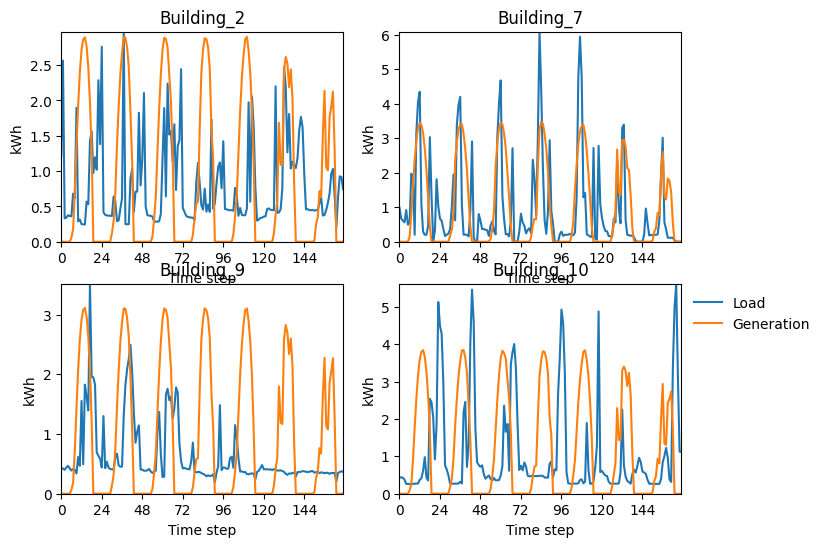

HTML(value='\n<h1>Custom RBC Tuner</h1>\n<p>Use this interactive widget to tune custom RBC!\nReference the bui…

IntProgress(value=0, description='Simulating', max=10, style=ProgressStyle(bar_color='maroon'))

Building-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.2

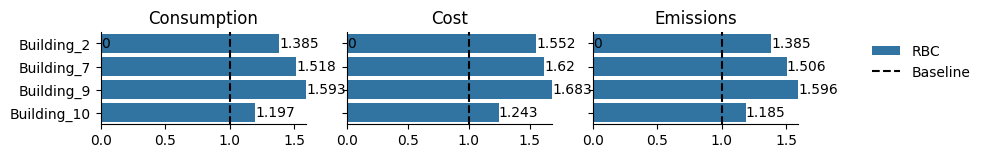

Building-level load profiles:


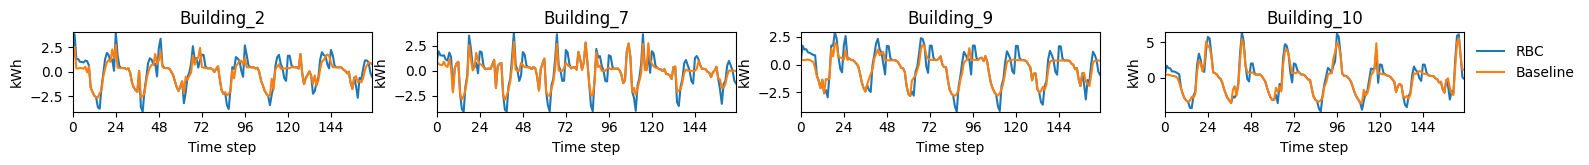

Battery SoC profiles:


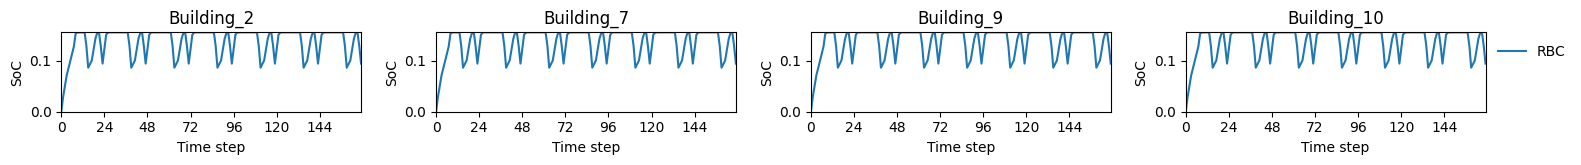

District-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


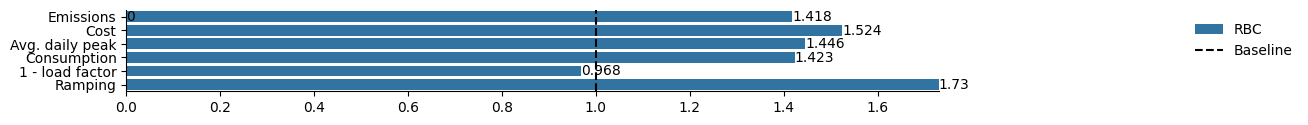

District-level load profiles:


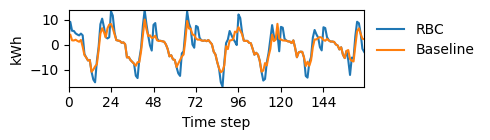

In [16]:
action_step = 0.05
hour_step = 2
hours = list(range(1, 25, hour_step))
default_loader_description = 'Waiting'
questions = """
<h1>Custom RBC Tuner</h1>
<p>Use this interactive widget to tune custom RBC!
Reference the building load profiles above and deciding to charge/discharge rule-based controlled batteries.</p>

<h3>Interact with the controls to tune RBC:</h3>

<p>Use the sliders to set the hourly charge and discharge rate
of the batteries. Positive values indicate charging
and negative values indicate discharging the batteries</p>
"""
html_ui = HTML(value=questions, placeholder='Questions')
sliders = [FloatSlider(
    value=0.0,
    min=-1.0,
    max=1.0,
    step=action_step,
    description=f'Hr: {h}-{h + hour_step - 1}',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
) for h in hours]

reset_button = Button(
    description='Reset', disabled=False, button_style='info',
    tooltip='Set all hour actions to 0.0', icon=''
)
random_button = Button(
    description='Random', disabled=False, button_style='warning',
    tooltip='Select random hour actions', icon=''
)
simulate_button = Button(
    description='Simulate', disabled=False, button_style='success',
    tooltip='Run simulation', icon='check'
)
sliders_ui = HBox(sliders)
buttons_ui = HBox([reset_button, random_button, simulate_button])

# run simulation so that the environment has results
# even if user does not interact with widgets
sac_episodes = 15
rbc_model.learn(episodes=sac_episodes)

loader = get_loader(description=default_loader_description)

loader.value = 0
loader.description = default_loader_description
options = np.arange(-0.5, 0.5, action_step)

for s in sliders:
    s.value = round(random.choice(options), 2)

def plot_building_guide(env):
    """Plots building load and generation profiles."""

    column_count_limit = 2
    building_count = len(env.buildings)
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 3.0*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, (ax, b) in enumerate(zip(fig.axes, env.buildings)):
        y1 = b.energy_simulation.non_shiftable_load
        y2 = b.pv.get_generation(b.energy_simulation.solar_generation)
        x = range(len(y1))
        ax.plot(x, y1, label='Load')
        ax.plot(x, y2, label='Generation')
        ax.set_title(b.name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)

    return fig

def on_reset_button_clicked(b):
    """Zeros sliders and loader values."""

    loader.value = 0
    loader.description = default_loader_description

    for s in sliders:
        s.value = 0.0

def on_random_button_clicked(b):
    """Zeros loader value and sets sliders to random values."""

    loader.value = 0
    loader.description = default_loader_description
    options = np.arange(-1.0, 1.0, action_step)

    for s in sliders:
        s.value = round(random.choice(options), 2)

def on_simulate_button_clicked(b):
    """Runs RBC simulation using selected action map."""

    loader.description = 'Simulating'
    loader.value = 0
    clear_output(wait=False)

    # plot building profiles
    _ = plot_building_guide(rbc_env)
    plt.show()

    display(html_ui, sliders_ui, buttons_ui, loader)
    reset_button.disabled = True
    random_button.disabled = True
    simulate_button.disabled = True

    for s in sliders:
        s.disabled = True

    action_map = {}

    for h, s in zip(hours, sliders):
        for i in range(hour_step):
            action_map[h + i] = s.value

    loader.max = rbc_env.time_steps*sac_episodes
    rbc_model.action_map = action_map
    rbc_model.learn(episodes=sac_episodes)

    loader.description = 'Finished'
    plot_simulation_summary({'RBC': rbc_env})

    reset_button.disabled = False
    random_button.disabled = False
    simulate_button.disabled = False

    for s in sliders:
        s.disabled = False

reset_button.on_click(on_reset_button_clicked)
random_button.on_click(on_random_button_clicked)
simulate_button.on_click(on_simulate_button_clicked)

# preview of building load profile
display(html_ui, sliders_ui, buttons_ui, loader)

simulate_button.click()

# An Introduction to Tabular Q-Learning Algorithm as an Adaptive Controller
---

Tuning your RBC must have revealed that it is a cumbersome and labor intensive process, especially as the number of buildings, time period and variance in load profiles increase. What we will be ideal is an adaptive controller that can adjust to different occupant preferences and behaviors in each building that influence load profiles and adjust to different weather conditions that affect the seasonal variance in load profiles.

Moreover, we want a controller that is able to learn with little to no knowledge about the environment model it is controlling unlike the RBC tuning process where you probably chose your charge and discharge proportion by visually inspecting the building load and generation profiles. Instead, we want a controller that can learn those patterns in a data-driven fashion.

## CityLearn Tabular Q-Learning Implementation

We can now go ahead to initialize our Q Learner. We will modify the CityLearn `TabularQLearning` class like we did the `HourRBC` so that we are able to visually track the learning process as well as keep tabs on its cummulative reward as training episodes go by. We also provide a `random_seed` instance variable that we set to the random seed you defined earlier. This random seed will ensure that each time this notebook is run, the epsilon-greedy action selections are reproducible. The modifications to the `TabularQLearning` class are done below:

With our Tabular Q-Learning agent set up, it is time to train it on our environment. We will use the following hyperparameters:

- `epsilon` ($\epsilon$) = 1.0
- `minimum_epsilon` ($\epsilon_{\textrm{min}}$) = 0.01
- `epsilon_decay` ($\epsilon_{\textrm{decay}}$) = 0.0001
- `discount_factor` ($\gamma$) = 0.99
- `learning_rate` ($\alpha$) = 0.005

The agent is trained for 50 episodes.

In [17]:
# Setting Random Seed
RANDOM_SEED = 0
print('Random seed:', RANDOM_SEED)

# edit next code line to change number of buildings in simulation
BUILDING_COUNT = 4

 # edit next code line to change number of days in simulation
DAY_COUNT = 7

# edit next code line to change active observations in simulation
ACTIVE_OBSERVATIONS = [
    "hour"
]

schema, buildings = set_schema_buildings(schema, BUILDING_COUNT, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step =\
    set_schema_simulation_period(schema, DAY_COUNT, RANDOM_SEED)
schema = set_active_observations(schema, ACTIVE_OBSERVATIONS)

print('Selected buildings:', buildings)
print(
    f'Selected {DAY_COUNT}-day period time steps:',
    (simulation_start_time_step, simulation_end_time_step)
)
print(f'Active observations:', ACTIVE_OBSERVATIONS)

schema['central_agent'] = True

Random seed: 0
Selected buildings: ['Building_2', 'Building_7', 'Building_9', 'Building_10']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour']


In [18]:
# ----------------- INITIALIZE ENVIRONMENT -----------------
tql_env = CityLearnEnv(schema)

# We will discretize the hour into 24 bins and the action into 12 bins. 
# Hour is an observation shared by all buildings thus, its values are 
# the same in all buildings at each time step. For this reason, 
# one of the dimensions of our Q-Table will equal the hour bin count. 
# The action space for controlling the batteries has the same size as 
# number of buildings thus when discretized, the other Q-Table dimension 
# will equal the "electrical_storage" action raised to the power 
# of building count

# define active observations and actions and their bin sizes
observation_bins = {'hour': 24}
action_bins = {'electrical_storage': 12}

# initialize list of bin sizes where each building
# has a dictionary in the list definining its bin sizes
observation_bin_sizes = []
action_bin_sizes = []

for b in tql_env.buildings:
    # add a bin size definition for the buildings
    observation_bin_sizes.append(observation_bins)
    action_bin_sizes.append(action_bins)

# -------------------- WRAP ENVIRONMENT --------------------
# wrap the environment to make sure we are exchanging discrete 
# observations and actions between the environment and agent
tql_env = TabularQLearningWrapper(
    tql_env.unwrapped,
    observation_bin_sizes=observation_bin_sizes,
    action_bin_sizes=action_bin_sizes
)

# ----------------- CALCULATE NUMBER OF TRAINING EPISODES -----------------
m = tql_env.observation_space[0].n
n = tql_env.action_space[0].n
t = tql_env.time_steps - 1
tql_episodes = 15
print('Q-Table dimension:', (m, n))
print('Number of episodes to train:', tql_episodes)

# ------------------------------- SET LOADER ------------------------------
loader = get_loader(max=tql_episodes*t)
display(loader)

# ----------------------- SET MODEL HYPERPARAMETERS -----------------------
tql_kwargs = {
    'epsilon': 1.0,
    'minimum_epsilon': 0.01,
    'epsilon_decay': 0.0001,
    'learning_rate': 0.005,
    'discount_factor': 0.99,
}

# ----------------------- INITIALIZE AND TRAIN MODEL ----------------------
class CustomTabularQLearning(TabularQLearning):
    def __init__(
        self, env: CityLearnEnv, loader: IntProgress,
        random_seed: int = None, **kwargs
    ):
        r"""Initialize CustomRBC.

        Parameters
        ----------
        env: Mapping[str, CityLearnEnv]
            CityLearn environment instance.
        loader: IntProgress
            Progress bar.
        random_seed: int
            Random number generator reprocucibility seed for
            eqsilon-greedy action selection.
        kwargs: dict
            Parent class hyperparameters
        """

        super().__init__(env=env, random_seed=random_seed, **kwargs)
        self.loader = loader
        self.reward_history = []

    def next_time_step(self):
        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])

        self.loader.value += 1
        super().next_time_step()

# -------------------- INITIALIZE AGENT --------------------
tql_model = CustomTabularQLearning(
    env=tql_env,
    loader=loader,
    random_seed=RANDOM_SEED,
    **tql_kwargs
)
_ = tql_model.learn(episodes=tql_episodes)

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


Q-Table dimension: (24, 20736)
Number of episodes to train: 15


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

Building-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.2

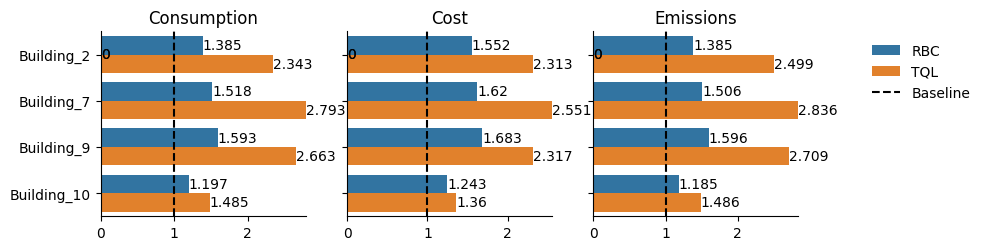

Building-level load profiles:


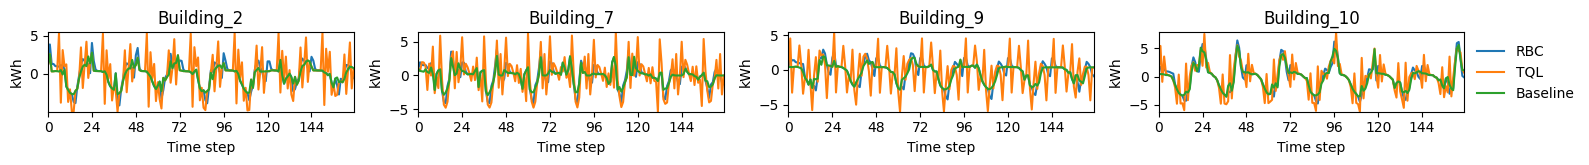

Battery SoC profiles:


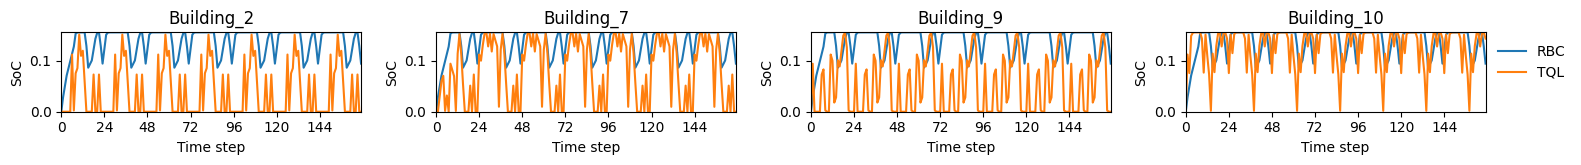

District-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


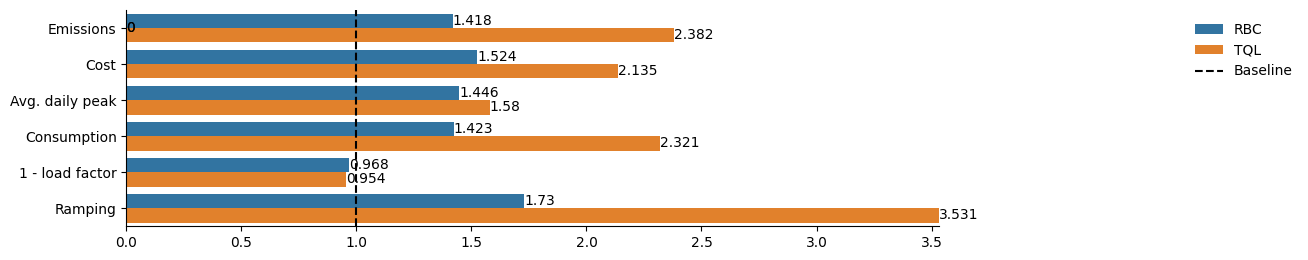

District-level load profiles:


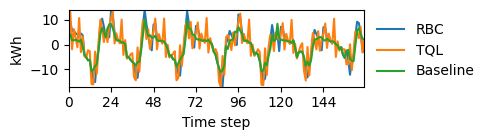

In [19]:
observations = tql_env.reset()

while not tql_env.done:
    actions = tql_model.predict(observations, deterministic=True)
    observations, _, _, _ = tql_env.step(actions)

# plot summary and compare with other control results
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env})

We now evaluate the trained model:

The figures plotted for the Tabular Q-Learning are compared against the baseline and your tuned RBC. The Q-Learning agent has performed worse than the baseline and RBC in terms of the building-level and district-level KPIs. The net electricity consumption profile as a result of the Q-Learning agent shows unstable and spiky consumption. The reason for this behavior is seen in the battery SoC curves where the changes in SoC are abrupt. This highlights an issue with our discretized action space having too large steps as trade off for maintaining a reasonably-sized Q-Table. We also see that the agent did not learn the unique day-to-day building needs as the SoC profile is identical every 24 time steps.

For the buildings 2 and 7 selected when the `RANDOM_SEED` = 0, we see that agent learned to charge the battery in building 2 in the early morning just after midnight and slightly charged and discharges during the day before completely depleting charge by midnight and into the early early hours if the next day. Building 7 on the other hand has 2 charge-discharge cycles each day that are split around noon.

Tabular Q-Learning is affected by the curse of dimensionality: as the size of the state space increases due to, e.g., continuous sensor inputs, the size of the Q-table has to necessarily increase is well. In particular for building control, the curse of dimensionality is significant, considering the potentially large number of sensors measuring various quantities (temperature, humidity, energy consumption, etc.) continuously. This means that the agent has an exponentially increasing number of state-action pairs to explore before it can converge to an optimal solution.

# Optimize a Soft-Actor Critic Reinforcement Learning Controller
---

To control an environment like CityLearn that has continuous states and actions, tabular Q-learning is not practical, as it suffers from the _curse of dimensionality_. Actor-critic reinforcement learning (RL) methods use artificial neural networks to generalize across the state-action space. The actor network maps the current states to the actions that it estimates to be optimal. Then, the critic network evaluates those actions by mapping them, together with the states under which they were taken, to the Q-values.

Soft actor-critic (SAC) is a model-free off-policy RL algorithm. As an off-policy method, SAC can reuse experience and learn from fewer samples. SAC is based on three key elements: an actor-critic architecture, off-policy updates, and entropy maximization for efficient exploration and stable training. SAC learns three different functions: the actor (policy), the critic (soft Q-function), and the value function.

In order to track the progress of learning, we will use a loader as we have done before. Stable Baselines3 makes use of callbacks to help with performing user-defined actions and procedures during learning. It is used to update the loader value and store aggregated rewards at each time step.

We will train the model for a fraction of the episodes we used to train the Tabular Q-Learning agent:

In [20]:
# Setting Random Seed
RANDOM_SEED = 0
print('Random seed:', RANDOM_SEED)

# edit next code line to change number of buildings in simulation
BUILDING_COUNT = 4

 # edit next code line to change number of days in simulation
DAY_COUNT = 7

# edit next code line to change active observations in simulation
ACTIVE_OBSERVATIONS = [
    "hour"
]

schema, buildings = set_schema_buildings(schema, BUILDING_COUNT, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step =\
    set_schema_simulation_period(schema, DAY_COUNT, RANDOM_SEED)
schema = set_active_observations(schema, ACTIVE_OBSERVATIONS)

print('Selected buildings:', buildings)
print(
    f'Selected {DAY_COUNT}-day period time steps:',
    (simulation_start_time_step, simulation_end_time_step)
)
print(f'Active observations:', ACTIVE_OBSERVATIONS)

schema['central_agent'] = True

Random seed: 0
Selected buildings: ['Building_2', 'Building_7', 'Building_9', 'Building_10']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour']


In [21]:
# ----------------- INITIALIZE ENVIRONMENT -----------------
sac_env = CityLearnEnv(schema)

# -------------------- WRAP ENVIRONMENT --------------------
# wrap the environment using the NormalizedObservationWrapper that 
# ensure all observations that are served to the agent are min-max 
# normalized between [0, 1] and cyclical observations
sac_env = NormalizedObservationWrapper(sac_env)

# we wrap with the StableBaselines3Wrapper that ensures observations, 
# actions and rewards are served in manner that is compatible with 
# Stable Baselines3 interface
sac_env = StableBaselines3Wrapper(sac_env)

# -------------------- INITIALIZE AGENT --------------------
sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=RANDOM_SEED)

# ----------------- NUMBER OF TRAINING EPISODES -----------------
sac_episodes = 15
print('Number of episodes to train:', sac_episodes)
sac_episode_timesteps = sac_env.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps

# ------------------------------- SET LOADER ------------------------------
sac_loader = get_loader(max=sac_total_timesteps)
display(sac_loader)

# ------------------------------- TRAIN MODEL -----------------------------
class CustomCallback(BaseCallback):
    def __init__(self, env: CityLearnEnv, loader: IntProgress):
        r"""Initialize CustomCallback.

        Parameters
        ----------
        env: Mapping[str, CityLearnEnv]
            CityLearn environment instance.
        loader: IntProgress
            Progress bar.
        """

        super().__init__(verbose=0)
        self.loader = loader
        self.env = env
        self.reward_history = [0]

    def _on_step(self) -> bool:
        r"""Called each time the env step function is called."""

        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])

        self.loader.value += 1

        return True
    
sac_callback = CustomCallback(env=sac_env, loader=sac_loader)
sac_model = sac_model.learn(
    total_timesteps=sac_total_timesteps,
    callback=sac_callback
)

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, w

Number of episodes to train: 15


IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


Building-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


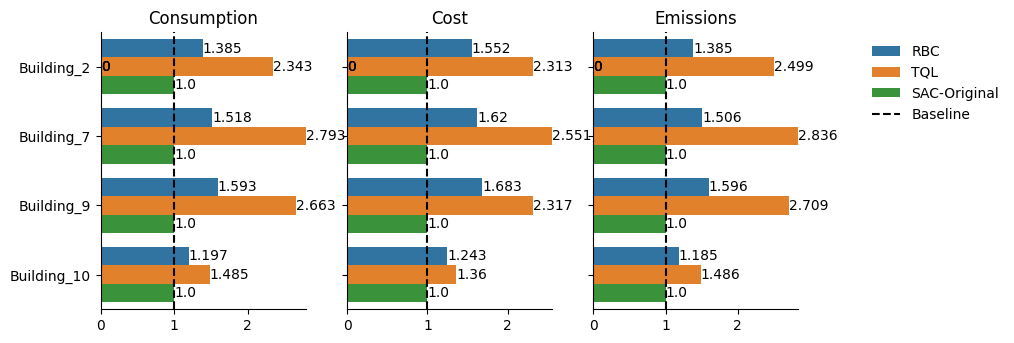

Building-level load profiles:


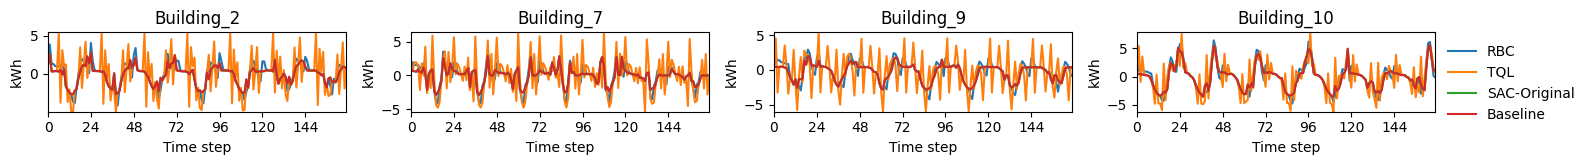

Battery SoC profiles:


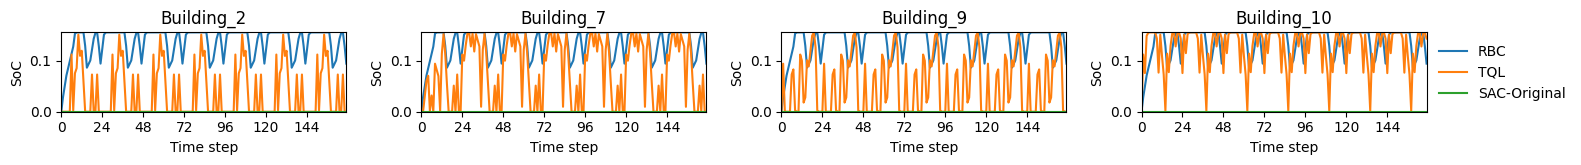

District-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


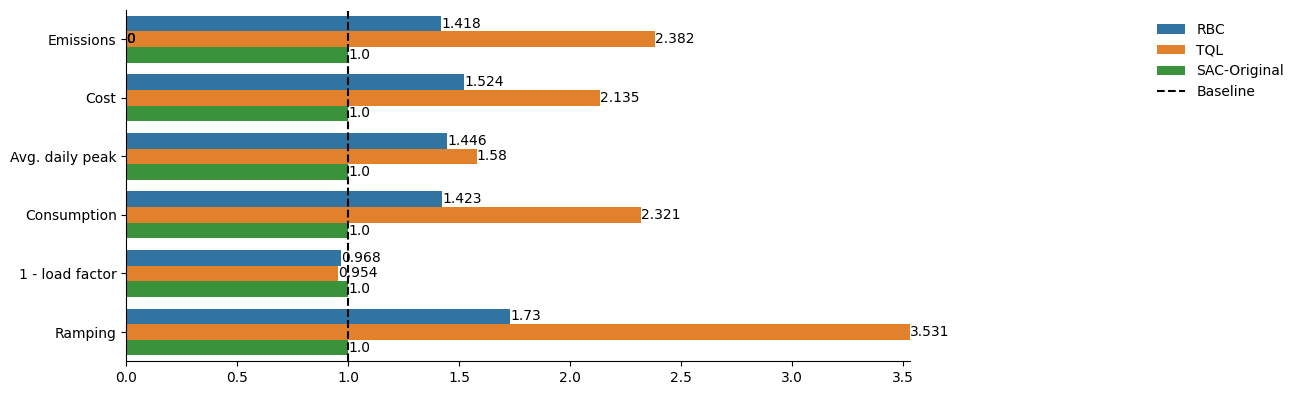

District-level load profiles:


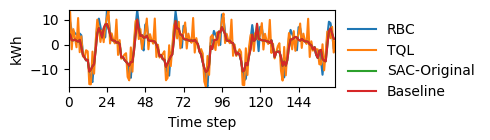

In [22]:
observations = sac_env.reset()
sac_actions_list = []

while not sac_env.done:
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, _, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env, 'SAC-Original': sac_env})

Recall that the Bellman equation uses a reward, $r$, to update the Q-values hence the Q-Table is sensitive to the way the $r$ changes for $(s, a, s')$ tuple. That is to say, we need to make sure the reward we calculate after an action, $a$, is taken at state, $s$, quantifies how-well that action actually causes desirable next state, $s'$. If we define a poor reward function, we risk not learning quickly, or undesirable outcomes.

The current reward functions is the electricity consumption from the grid at the current time step returned as a negative value. While this reward will penalize high electricity consumption, it might not be ideal for all KPIs we are trying to optimize. As you would imagine, the best way to minimize electricity consumption is to try to move all loads to the battery hence, the insistence of the agent to continue to discharge the batteries!

## Defining a Custom Reward Function

We want to reduce electricity consumption but also reduce its cost and emissions. Likewise, we want to reduce the peaks and ramping, and increase the load factor. One way to achieve this is to teach the agent to charge the batteries when electricity is cheap after 9 PM and before 4 PM, which typically coincides with when the grid is cleaner (lower emissions). But recall that each building is able to generate power provided there is solar radiation. So, we can take advantage of self-generation in the late morning to late afternoon to charge for free and discharge the rest of the day thus reducing electricity consumption, cost and emissions at the very least. Also, by shifting the early morning and evening peak loads to the batteries we can improve on our peak and load-factor KPIs.

We should also teach our agent to ensure that renewable solar generation is not wasted by making use of the PV to charge the batteries while they are charged below capacity. On the flip side, the agent should learn to discharge when there is net positive grid load and the batteries still have stored energy.

Given these learning objectives, we can now define a reward function that closely satisfies the criteria for which the agent will learn good rewards:

$$
    r = \sum_{i=0}^n \Big(p_i \times |C_i|\Big)
$$

$$
    p_i = -\left(1 + \textrm{sign}(C_i) \times \textrm{SOC}^{\textrm{battery}}_i\right)
$$

The reward function, $r$, is designed to minimize electricity cost, $C$. It is calculated for each building, $i$ and summed to provide the agent with a reward that is representative of all $n$ buildings. It encourages net-zero energy use by penalizing grid load satisfaction when there is energy in the battery as well as penalizing net export when the battery is not fully charged through the penalty term, $p$. There is neither penalty nor reward when the battery is fully charged during net export to the grid. Whereas, when the battery is charged to capacity and there is net import from the grid the penalty is maximized.

Now we define this custom reward below and set it as the reward for the SAC agent.

In [23]:
class CustomReward(RewardFunction):
    def __init__(self, env_metadata: Mapping[str, Any]):
        r"""Initialize CustomReward.

        Parameters
        ----------
        env_metadata: Mapping[str, Any]:
            General static information about the environment.
        """

        super().__init__(env_metadata)

    def calculate(
        self, observations: List[Mapping[str, Union[int, float]]]
    ) -> List[float]:
        r"""Returns reward for most recent action.

        The reward is designed to minimize electricity cost.
        It is calculated for each building, i and summed to provide the agent
        with a reward that is representative of all n buildings.
        It encourages net-zero energy use by penalizing grid load satisfaction
        when there is energy in the battery as well as penalizing
        net export when the battery is not fully charged through the penalty
        term. There is neither penalty nor reward when the battery
        is fully charged during net export to the grid. Whereas, when the
        battery is charged to capacity and there is net import from the
        grid the penalty is maximized.

        Parameters
        ----------
        observations: List[Mapping[str, int | float]]
            List of all building observations at current
            :py:attr:`citylearn.citylearn.CityLearnEnv.time_step`
            that are got from calling
            :py:meth:`citylearn.building.Building.observations`.

        Returns
        -------
        reward: List[float]
            Reward for transition to current timestep.
        """

        reward_list = []

        for o, m in zip(observations, self.env_metadata['buildings']):
            cost = o['net_electricity_consumption']*o['electricity_pricing']
            battery_capacity = m['electrical_storage']['capacity']
            battery_soc = o.get('electrical_storage_soc', 0.0)
            penalty = -(1.0 + np.sign(cost)*battery_soc)
            reward = penalty*abs(cost)
            reward_list.append(reward)

        reward = [sum(reward_list)]

        return reward

Let us repeat all the previous steps we took in the former SAC simulation where the only difference in the workflow here is the use of our new custom reward function:

In [24]:
# ----------------- INITIALIZE ENVIRONMENT -----------------
sacr_env = CityLearnEnv(schema)

# -------------------- SET CUSTOM REWARD -------------------
sacr_env.reward_function = CustomReward(sacr_env.get_metadata())

# -------------------- WRAP ENVIRONMENT --------------------
sacr_env = NormalizedObservationWrapper(sacr_env)
sacr_env = StableBaselines3Wrapper(sacr_env)

# -------------------- INITIALIZE AGENT --------------------
sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=RANDOM_SEED)

# ----------------------- SET LOADER -----------------------
print('Number of episodes to train:', sac_episodes)
sac_modr_loader = get_loader(max=sac_total_timesteps)
display(sac_modr_loader)

# ----------------------- TRAIN AGENT ----------------------
sacr_callback = CustomCallback(env=sacr_env, loader=sac_modr_loader)
sacr_model = sacr_model.learn(
    total_timesteps=sac_total_timesteps,
    callback=sacr_callback
)

Number of episodes to train: 15


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, w

IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.2

Building-level KPIs:


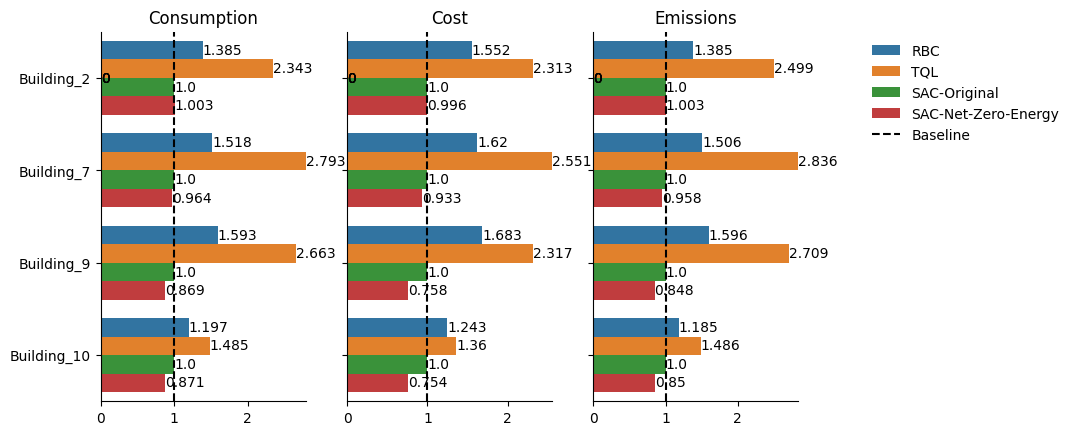

Building-level load profiles:


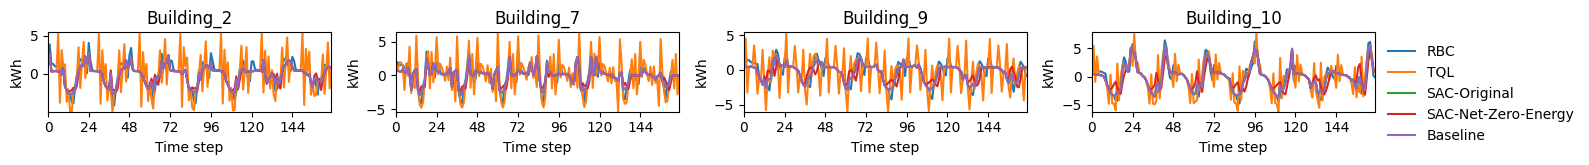

Battery SoC profiles:


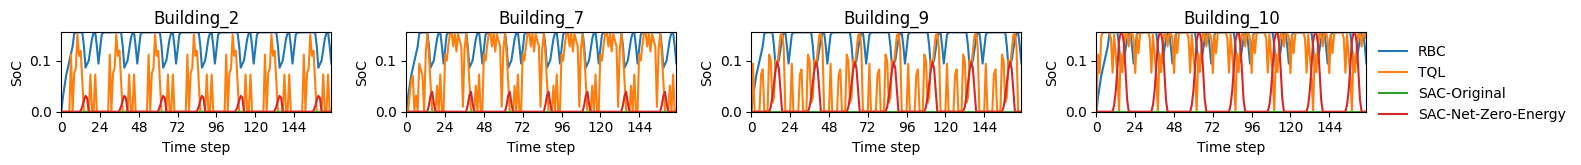

District-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


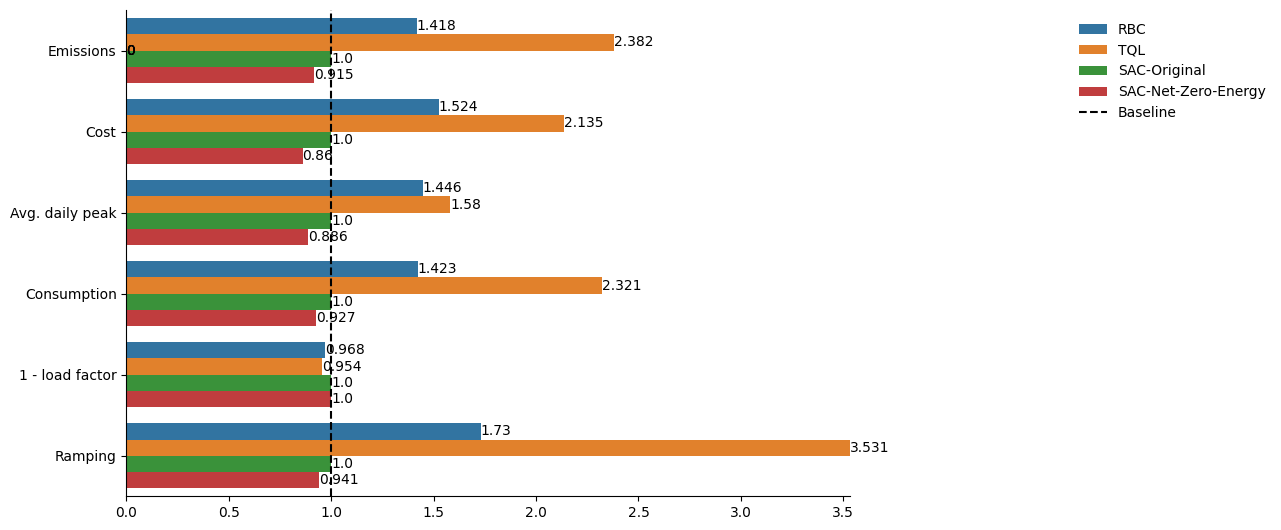

District-level load profiles:


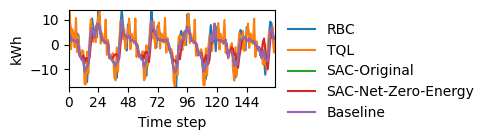

In [25]:
observations = sacr_env.reset()
sacr_actions_list = []

while not sacr_env.done:
    actions, _ = sacr_model.predict(observations, deterministic=True)
    observations, _, _, _ = sacr_env.step(actions)
    sacr_actions_list.append(actions)

plot_simulation_summary(
    {'RBC': rbc_env, 'TQL': tql_env, 'SAC-Original': sac_env, 'SAC-Net-Zero-Energy': sacr_env}
)

Finally, evaluate the trained model:

## Evaluate the Episode Rewards for RL Algorithms

We can also investigate the convergence rate in training by looking at the sum of rewards in each episode. We expect to see the reward sum increase as we train on more episodes and eventually plateau when exploitation increases or performance can not be further improved. We will look at the reward trajectory for the Tabular Q-Learning, SAC with and without custom reward models:

In [26]:
def plot_rewards(ax: plt.Axes, rewards: List[float], title: str) -> plt.Axes:
    """Plots rewards over training episodes.

    Parameters
    ----------
    rewards: List[float]
        List of reward sum per episode.
    title: str
        Plot axes title

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    ax.plot(rewards)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.set_title(title)

    return ax

# Tune our SAC Agent
---

Thus far, the soft-actor critic (SAC) off-policy reinforcement learning (RL) algorithm with and crude reward function and a better tailored reward function.

When each control agent is evaluated on the a set of building-level and district-level KPIs, we find that if carefully tuned, custom RBC will improve/broken the baseline albeit a painstaking effort. The Tabular Q-Learning agent has the potential to adapt to unique building properties but suffers from the curse of dimensionality affecting its convergence to an optimal solution for the battery management. We also find that the SAC agent is sensitive to the reward function design and with a custom reward that is tailored towards achieving our evaluation KPIs, we can achieve a performance that is better than the baseline case and potentially better than an averagely tuned RBC.

We also optimizing the SAC hyperparameters. In our previous models, we used the default Stable Baselines3 hyperparameters. Hyperparameter tuning is an central of reinforcement learning. It's a traditional problems of what the hyperparameters mean, their typical values and appropriate values for different case scenarios.

We also choose to update the active observations. Recall that thus far, we have only used the `hour, day_type, solar_generation` observation.

## Set Environment, Agent and Reward Function

In [ ]:
# -------------------- CUSTOMIZE ENVIRONMENT --------------------
# Include other observations if needed.
# See https://www.citylearn.net/overview/observations.html
# for table of observations that you can include
# NOTE: More active observations could mean longer trainer time.
import torch as th

our_active_observations = [
    "hour",
    "day_type",
    "net_electricity_consumption",
    "electricity_pricing",
    "solar_generation",
    "electrical_storage_soc"
]

# ------------------ SET AGENT HYPERPARAMETERS ------------------
# try out different hyperparameter value combinations to see
# which one provides you with the best KPIs. See
# https://github.com/yosider/ml-agents-1/blob/master/docs/Training-SAC.md#training-with-soft-actor-critic
# for a guide on how to select hyperparameter values.
our_agent_kwargs = {
    "learning_rate": 0.0003,
    "buffer_size": 1000000,
    "learning_starts": 100,
    "batch_size": 256,
    'tau': 0.001,
    'gamma': 0.98,
    'train_freq': 1,
    "gradient_steps": 1,
    "ent_coef": "auto_0.1",
}

# --------------- SET NUMBER OF TRAINING EPISODES ---------------
our_episodes = 15

# --------------- DEFINE CUSTOM REWARD FUNCTION -----------------
# To easier to outperform a "cost-only" reward on KPIs:
# Emphasize cost: higher price -> stronger penalty for grid import
# Emphasize peak: penalize "new daily peak" (peak increase)
# Emphasize ramping: penalize changes in district import over time
# Encourage arbitrage: reward charging when cheap / discharging when expensive (using SOC change * price deviation from a moving average)
# Discourage wasting solar: if the battery is not near full, exporting is penalized (encourages storing locally first)
class OurCustomReward(RewardFunction):

    def __init__(self, env_metadata: Mapping[str, Any]):
        super().__init__(env_metadata)

        # Weights (increase the weight for the KPIs want to prioritize) ---
        self.w_cost = 1.0           # Cost term (main objective)
        self.w_peak_inc = 0.40      # New daily peak penalty (larger -> stronger peak shaving)
        self.w_ramp = 0.15          # Ramping penalty
        self.w_export = 0.30        # Penalty for exporting when battery is not full
        self.w_grid_when_soc = 0.10 # Penalty for importing from grid while having SOC
        self.w_arbitrage = 0.08     # Reward for buy-low / sell-high behavior
        self.w_cycle = 0.002        # Small penalty to discourage excessive cycling

        # Internal state
        self._prev_district_import = None
        self._prev_soc = None
        self._prev_hour = None
        self._day_max_import = 0.0
        self._price_ema = None
        self._ema_alpha = 0.02

    # Reset internal buffers at the beginning of an episode
    def reset(self):
        self._prev_district_import = None
        self._prev_soc = None
        self._prev_hour = None
        self._day_max_import = 0.0
        self._price_ema = None

    def calculate(self, observations: List[Mapping[str, Union[int, float]]]) -> List[float]:
        buildings_meta = self.env_metadata.get("buildings", [])
        n = len(observations)

        # Use hour to detect a new day and reset the daily peak tracker
        hour = float(observations[0].get("hour", 0.0) or 0.0)
        if self._prev_hour is not None and hour < self._prev_hour:
            self._day_max_import = 0.0
        self._prev_hour = hour

        # Electricity price (use the mean across buildings as a district-level proxy)
        price_list = [float(o.get("electricity_pricing", 0.0) or 0.0) for o in observations]
        price = float(np.mean(price_list)) if len(price_list) > 0 else 0.0

        # Exponential moving average (EMA) of price for "relative expensiveness"
        if self._price_ema is None:
            self._price_ema = price
        else:
            self._price_ema = (1 - self._ema_alpha) * self._price_ema + self._ema_alpha * price
        price_adv = price - self._price_ema  # >0 means "expensive" relative to EMA

        # Initialize previous SOC on first call
        soc = np.array([float(o.get("electrical_storage_soc", 0.0) or 0.0) for o in observations], dtype=np.float32)
        if self._prev_soc is None:
            self._prev_soc = soc.copy()

        # Net electricity: positive -> import, negative -> export
        net = np.array([float(o.get("net_electricity_consumption", 0.0) or 0.0) for o in observations], dtype=np.float32)
        imp = np.maximum(net, 0.0)     # kWh imported from the grid
        exp = np.maximum(-net, 0.0)    # kWh exported to the grid

        # District-level import (sum across all buildings)
        district_import = float(np.sum(imp))

        # Ramping: absolute change in district import from previous step
        ramp = 0.0 if self._prev_district_import is None else abs(district_import - self._prev_district_import)
        self._prev_district_import = district_import

        # Daily peak increase: penalize only when a new (higher) peak occurs within the day
        prev_day_max = self._day_max_import
        self._day_max_import = max(self._day_max_import, district_import)
        peak_inc = max(0.0, district_import - prev_day_max)

        # SOC delta -> approximate charge/discharge energy (kWh) using storage capacity
        dsoc = soc - self._prev_soc
        self._prev_soc = soc.copy()

        capacities = []
        for m in buildings_meta:
            cap = 0.0
            try:
                cap = float(m.get("electrical_storage", {}).get("capacity", 0.0) or 0.0)
            except Exception:
                cap = 0.0
            capacities.append(cap)

        # Fallback if metadata length doesn't match observation count
        if len(capacities) != n:
            capacities = [1.0] * n

        cap = np.array(capacities, dtype=np.float32)
        charge_e = np.maximum(dsoc, 0.0) * cap        # kWh charged into storage
        discharge_e = np.maximum(-dsoc, 0.0) * cap    # kWh discharged from storage
        cycle_e = charge_e + discharge_e              # total throughput (cycle intensity)

        # Cost: importing is more painful when price is high
        cost_pen = np.sum(imp) * price

        # Export penalty when battery is not near full: encourages storing solar locally first (lower SOC -> stronger penalty)
        export_pen = float(np.sum(exp * np.maximum(0.0, 0.95 - soc)))

        # Importing while having SOC: encourages using battery to cover load
        grid_when_soc_pen = float(np.sum(imp * soc))

        # Arbitrage: reward discharging when price is high and charging when price is low (price_adv > 0 favors discharge; price_adv < 0 favors charge)
        arbitrage_bonus = float(np.sum((discharge_e - charge_e) * price_adv))

        # Peak / ramp penalties
        peak_pen = peak_inc ** 2
        ramp_pen = ramp

        # Small penalty for excessive cycling
        cycle_pen = float(np.sum(cycle_e))

        reward = (
            - self.w_cost * cost_pen
            - self.w_export * export_pen
            - self.w_grid_when_soc * grid_when_soc_pen
            - self.w_peak_inc * peak_pen
            - self.w_ramp * ramp_pen
            + self.w_arbitrage * arbitrage_bonus
            - self.w_cycle * cycle_pen
        )

        return [float(reward)] 

## Train

Here we define one function that performs all the procedures we took to train the SAC agent from selecting buildings, simulation period and active observations to initializing and wrapping the environment, initializing the agent, training it a nd reporting it's results:

In [28]:
def train_our_custom_sac(
    agent_kwargs: dict, episodes: int, reward_function: RewardFunction,
    building_count: int, day_count: int, active_observations: List[str],
    random_seed: int, reference_envs: Mapping[str, CityLearnEnv] = None,
    show_figures: bool = None
) -> dict:
    """Trains a custom soft-actor critic (SAC) agent on a custom environment.

    Trains an SAC agent using a custom environment and agent hyperparamter
    setup and plots the key performance indicators (KPIs), actions and
    rewards from training and evaluating the agent.

    Parameters
    ----------
    agent_kwargs: dict
        Defines the hyperparameters used to initialize the SAC agent.
    episodes: int
        Number of episodes to train the agent for.
    reward_function: RewardFunction
        A base or custom reward function class.
    building_count: int
        Number of buildings to set as active in schema.
    day_count: int
        Number of simulation days.
    active_observations: List[str]
        Names of observations to set active to be passed to control agent.
    random_seed: int
        Seed for pseudo-random number generator.
    reference_envs: Mapping[str, CityLearnEnv], default: None
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    show_figures: bool, default: False
        Indicate if summary figures should be plotted at the end of
        evaluation.

    Returns
    -------
    result: dict
        Results from training the agent as well as some input variables
        for reference including the following value keys:

            * random_seed: int
            * env: CityLearnEnv
            * model: SAC
            * actions: List[float]
            * rewards: List[float]
            * agent_kwargs: dict
            * episodes: int
            * reward_function: RewardFunction
            * buildings: List[str]
            * simulation_start_time_step: int
            * simulation_end_time_step: int
            * active_observations: List[str]
            * train_start_timestamp: datetime
            * train_end_timestamp: datetime
    """

    # get schema
    schema = DataSet().get_schema('citylearn_challenge_2022_phase_all')

    # select buildings
    schema, buildings = set_schema_buildings(
        schema, building_count, random_seed
    )
    print('Selected buildings:', buildings)

    # select days
    schema, simulation_start_time_step, simulation_end_time_step =\
        set_schema_simulation_period(schema, day_count, random_seed)
    print(
        f'Selected {day_count}-day period time steps:',
        (simulation_start_time_step, simulation_end_time_step)
    )

    # set active observations
    schema = set_active_observations(schema, active_observations)
    print(f'Active observations:', active_observations)

    # initialize environment
    env = CityLearnEnv(schema, central_agent=True)

    # set reward function
    env.reward_function = reward_function(env.get_metadata())
    base_env = env 
    # wrap environment
    env = NormalizedObservationWrapper(env)
    env = StableBaselines3Wrapper(env)

    # initialize agent
    model = SAC('MlpPolicy', env, **agent_kwargs, seed=random_seed)

    # initialize loader
    total_timesteps = episodes*(env.time_steps - 1)
    print('Number of episodes to train:', episodes)
    loader = get_loader(max=total_timesteps)
    display(loader)

    # initialize callback
    callback = CustomCallback(env=env, loader=loader)

    # train agent
    train_start_timestamp = datetime.utcnow()
    model = model.learn(total_timesteps=total_timesteps, callback=callback)
    train_end_timestamp = datetime.utcnow()

    # evaluate agent
    observations = env.reset()
    actions_list = []

    while not env.done:
        actions, _ = model.predict(observations, deterministic=True)
        observations, _, _, _ = env.step(actions)
        actions_list.append(actions)

    # get rewards
    rewards = callback.reward_history[:episodes]

    # plot summary and compare with other control results
    if show_figures is not None and show_figures:
        env_id = 'SAC-Our'

        if reference_envs is None:
            reference_envs = {env_id: env}
        else:
            reference_envs = {**reference_envs, env_id: env}

        plot_simulation_summary(reference_envs)

        # plot actions
        plot_actions(actions_list, f'{env_id} Actions')

        # plot rewards
        _, ax = plt.subplots(1, 1, figsize=(5, 2))
        ax = plot_rewards(ax, rewards, f'{env_id} Rewards')
        plt.tight_layout()
        plt.show()

    else:
        pass

    return {
        'random_seed': random_seed,
        'env': env,
        'model': model,
        'actions': actions_list,
        'rewards': rewards,
        'agent_kwargs': agent_kwargs,
        'episodes': episodes,
        'reward_function': reward_function,
        'buildings': buildings,
        'simulation_start_time_step': simulation_start_time_step,
        'simulation_end_time_step': simulation_end_time_step,
        'active_observations': active_observations,
        'train_start_timestamp': train_start_timestamp,
        'train_end_timestamp': train_end_timestamp,
    }

Selected buildings: ['Building_2', 'Building_7', 'Building_9', 'Building_10']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour', 'day_type', 'net_electricity_consumption', 'electricity_pricing', 'solar_generation', 'electrical_storage_soc']
Number of episodes to train: 15


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, w

IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\gym\core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(
c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas

Building-level KPIs:


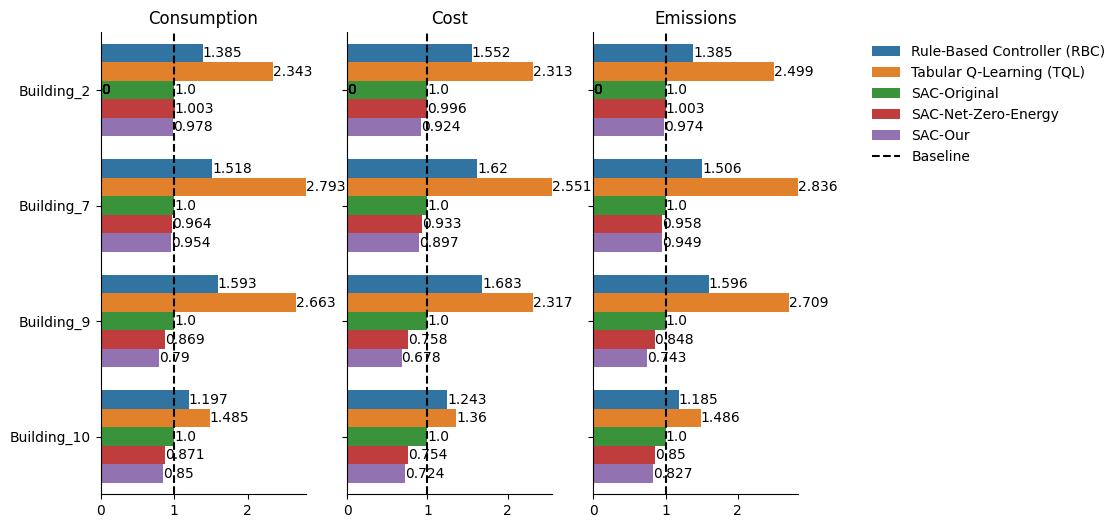

Building-level load profiles:


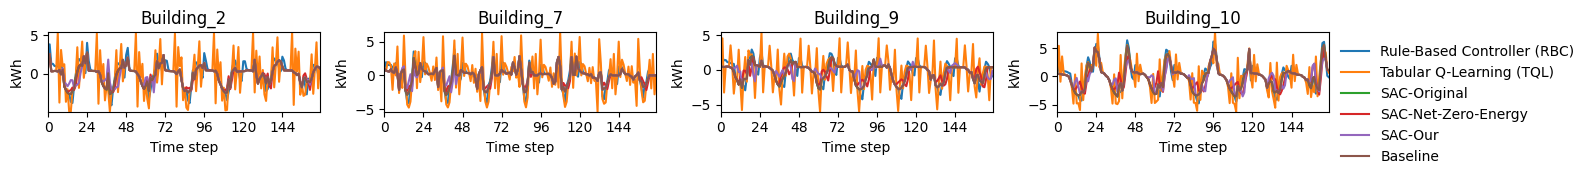

Battery SoC profiles:


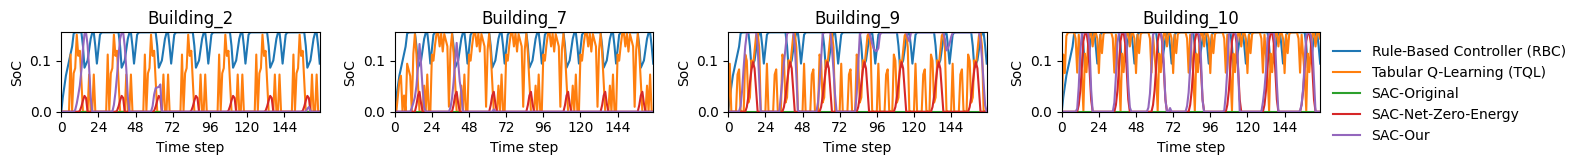

District-level KPIs:


c:\Users\79206\miniconda3\envs\citylearn\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


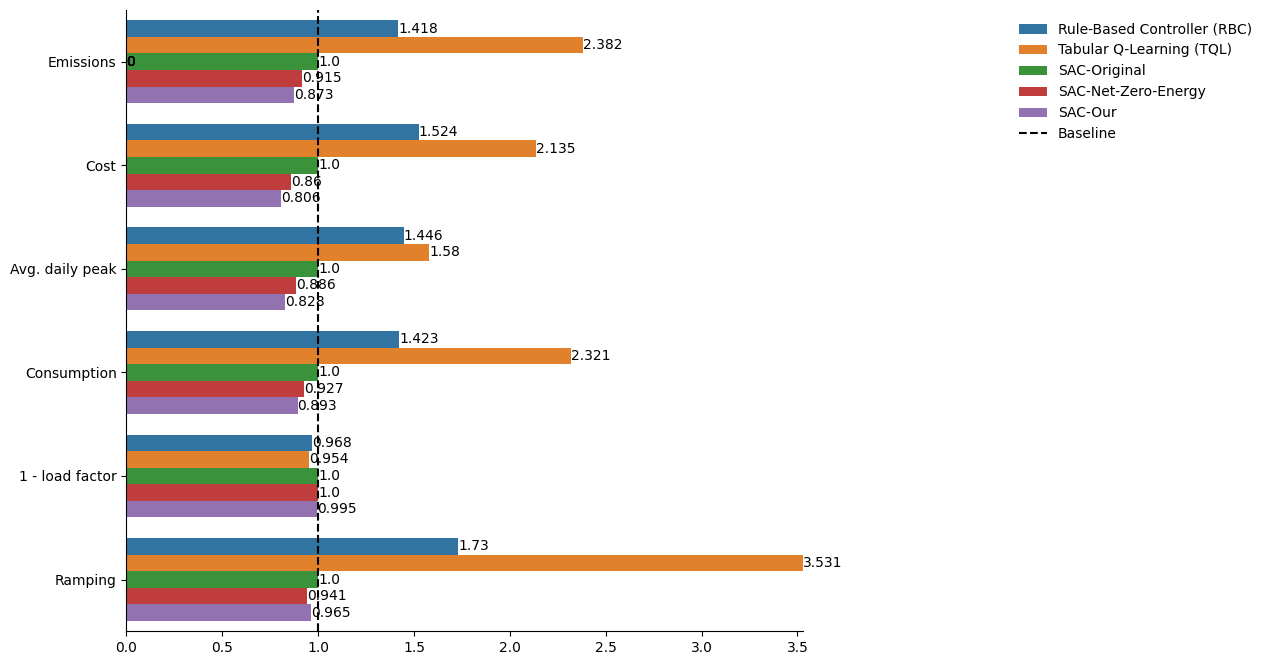

District-level load profiles:


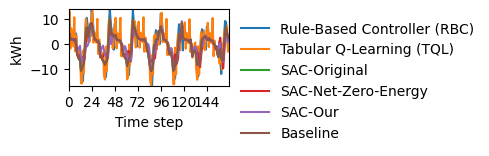

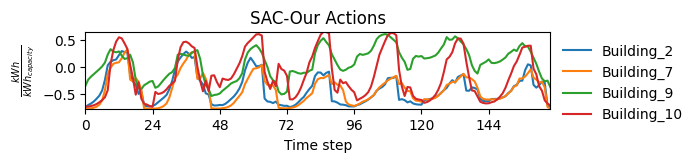

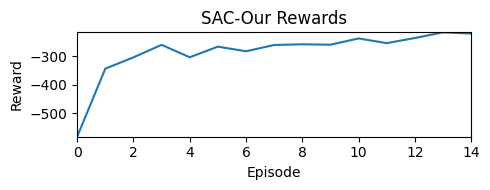

In [29]:
our_results = train_our_custom_sac(
    agent_kwargs=our_agent_kwargs,
    episodes=our_episodes,
    reward_function=OurCustomReward,
    building_count=BUILDING_COUNT,
    day_count=DAY_COUNT,
    active_observations=our_active_observations,
    random_seed=RANDOM_SEED,
    reference_envs={
        'Rule-Based Controller (RBC)': rbc_env,
        'Tabular Q-Learning (TQL)': tql_env,
        'SAC-Original': sac_env,
        'SAC-Net-Zero-Energy': sacr_env
    },
    show_figures=True,
)

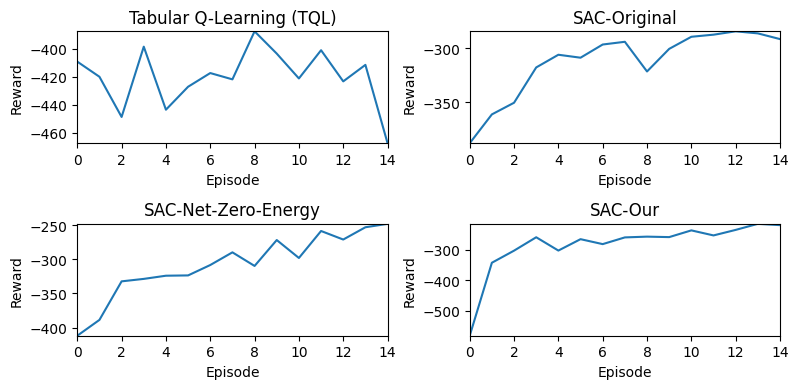

In [30]:
rewards = {
    'Tabular Q-Learning (TQL)': tql_model.reward_history[:tql_episodes],
    'SAC-Original': sac_callback.reward_history[:sac_episodes],
    'SAC-Net-Zero-Energy': sacr_callback.reward_history[:sac_episodes],
    'SAC-Our': our_results['rewards'][:sac_episodes]
}
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

for ax, (k, v) in zip(fig.axes, rewards.items()):
    ax = plot_rewards(ax, v, k)

plt.tight_layout()
plt.show()